# Telecom Churn Case Study

In [1]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix, auc,roc_curve, classification_report, roc_auc_score,accuracy_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the CSV file
df = pd.read_csv('telecom_churn_data.csv')
pd.set_option('display.max_columns', None)
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [3]:
# Checking the shape of the dataframe
df.shape

(99999, 226)

In [4]:
# Checking the datatype of each feature
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [5]:
# Checking the percentage of missing value
pd.set_option('display.max_rows', None)
round((df.isnull().sum()/len(df))*100,2).sort_values(ascending = False)

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
arpu_3g_7                   74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
total_rech_data_9           74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
count_rech_2g_

### Data Understanding / Data Cleaning

In [6]:
# Creating num_vars based the the data type int and float
num_vars = df.select_dtypes(include=['int32', 'int64', 'float64'])
num_vars.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

    arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  197.385  214.816  213.803   21.100          NaN          NaN         0.00   
1   34.047  355.074  268.321   86.285        24.11        78.68         7.68   
2  167.690  189.058  210.226  290.714        11.54        55.24        37.26   
3  221.338  251.102  508.054  389.500        99.91        54.39       310.98   
4  261.636  309.876  238.174  163.426        50.31       149.44        83.89   

   onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
0          NaN           NaN           NaN          0.00           NaN   
1        18.34         15.74         99.84        304.76         53.76   
2        74.81        143.33        220.59        208.36        118.91   
3       241.71        123.31        109.01         71.68        113.54   
4        58.78         76.96         91.88        124.26         45.81   

   roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
0            NaN            NaN           0.00            NaN            NaN   
1            0.0           0.00           0.00           0.00            0.0   
2            0.0           0.00           0.00          38.49            0.0   
3            0.0          54.86          44.38           0.00            0.0   
4            0.0           0.00           0.00           0.00            0.0   

   roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
0            NaN           0.00            NaN               NaN   
1           0.00           0.00           0.00             23.88   
2           0.00           0.00          70.94              7.19   
3          28.09          39.04           0.00             73.68   
4           0.00           0.00           0.00             50.31   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  \
0               NaN              0.00               NaN               NaN   
1             74.56              7.68             18.34             11.51   
2             28.74             13.58             14.39             29.34   
3             34.81             10.61             15.49            107.43   
4            149.44             83.89             58.78             67.64   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  \
0               NaN              0.00               NaN               NaN   
1             75.94            291.86             53.76              0.00   
2             16.86             38.46             28.16             24.11   
3             83.21             22.46             65.46              1.91   
4             91.88            124.26             37.89              0.00   

   loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  \
0               NaN              0.00               NaN               NaN   
1              0.00              0.00              0.00               0.0   
2             21.79             15.61             22.24               0.0   
3              0.65              4.91              2.06               0.0   
4              0.00              0.00              1.93               0.0   

   loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  \
0               NaN              0.00               NaN           NaN   
1              2.91              0.00              0.00         35.39   
2            135.54             45.76              0.48         60.66   
3              0.00            

In [7]:
num_vars.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [8]:
# Finding the number of unique values in the columns
num_vars.nunique()

mobile_number         99999
circle_id                 1
loc_og_t2o_mou            1
std_og_t2o_mou            1
loc_ic_t2o_mou            1
arpu_6                85681
arpu_7                85308
arpu_8                83615
arpu_9                79937
onnet_mou_6           24313
onnet_mou_7           24336
onnet_mou_8           24089
onnet_mou_9           23565
offnet_mou_6          31140
offnet_mou_7          31023
offnet_mou_8          30908
offnet_mou_9          30077
roam_ic_mou_6          6512
roam_ic_mou_7          5230
roam_ic_mou_8          5315
roam_ic_mou_9          4827
roam_og_mou_6          8038
roam_og_mou_7          6639
roam_og_mou_8          6504
roam_og_mou_9          5882
loc_og_t2t_mou_6      13539
loc_og_t2t_mou_7      13411
loc_og_t2t_mou_8      13336
loc_og_t2t_mou_9      12949
loc_og_t2m_mou_6      20905
loc_og_t2m_mou_7      20637
loc_og_t2m_mou_8      20544
loc_og_t2m_mou_9      20141
loc_og_t2f_mou_6       3860
loc_og_t2f_mou_7       3863
loc_og_t2f_mou_8    

In [9]:
# Dropping the columns which have only 1 unique value
df.drop(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 
            'std_og_t2c_mou_8',  'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'], axis = 1, inplace = True)

In [10]:
df.shape

(99999, 216)

In [11]:
# Creating cat_vars based on the data type object
cat_vars = df.select_dtypes(include=['object'])
cat_vars.head()

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9 date_of_last_rech_6 date_of_last_rech_7  \
0            9/30/2014           6/21/2014           7/16/2014   
1            9/30/2014           6/29/2014           7/31/2014   
2            9/30/2014           6/17/2014           7/24/2014   
3            9/30/2014           6/28/2014           7/31/2014   
4            9/30/2014           6/26/2014           7/28/2014   

  date_of_last_rech_8 date_of_last_rech_9 date_of_last_rech_data_6  \
0            8/8/2014           9/28/2014                6/21/2014   
1           8/28/2014           9/30/2014                      NaN   
2           8/14/2014           9/29/2014                      NaN   
3           8/31/2014           9/30/2014                      NaN   
4            8/9/2014           9/28/2014                 6/4/2014   

  date_of_last_rech_data_7 date_of_last_rech_data_8 date_of_last_rech_data_9  
0                7/16/2014                 8/8/2014                      NaN  
1                7/25/2014                8/10/2014                      NaN  
2                      NaN                      NaN                9/17/2014  
3                      NaN                      NaN                      NaN  
4                      NaN                      NaN                      NaN

In [12]:
cat_vars.describe()

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
count                 99999                99398                98899   
unique                    1                    1                    1   
top               6/30/2014            7/31/2014            8/31/2014   
freq                  99999                99398                98899   

       last_date_of_month_9 date_of_last_rech_6 date_of_last_rech_7  \
count                 98340               98392               98232   
unique                    1                  30                  31   
top               9/30/2014           6/30/2014           7/31/2014   
freq                  98340               16960               17288   

       date_of_last_rech_8 date_of_last_rech_9 date_of_last_rech_data_6  \
count                96377               95239                    25153   
unique                  31                  30                       30   
top              8/31/2014           9/29/2014                6/30/2014   
freq                 14706               22623                     1888   

       date_of_last_rech_data_7 date_of_last_rech_data_8  \
count                     25571                    26339   
unique                       31                       31   
top                   7/31/2014                8/31/2014   
freq                       1813                     1998   

       date_of_last_rech_data_9  
count                     25922  
unique                       30  
top                   9/29/2014  
freq                       2329

In [13]:
cat_vars.nunique()

last_date_of_month_6         1
last_date_of_month_7         1
last_date_of_month_8         1
last_date_of_month_9         1
date_of_last_rech_6         30
date_of_last_rech_7         31
date_of_last_rech_8         31
date_of_last_rech_9         30
date_of_last_rech_data_6    30
date_of_last_rech_data_7    31
date_of_last_rech_data_8    31
date_of_last_rech_data_9    30
dtype: int64

In [14]:
# Dropping the columns which have only 1 unique value
df.drop(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8','last_date_of_month_9'], axis = 1, inplace = True)

In [15]:
df.shape

(99999, 212)

In [16]:
# As we can see these are date values so converting them in date time format
df['date_of_last_rech_6'] = pd.to_datetime(df['date_of_last_rech_6'])
df['date_of_last_rech_7'] = pd.to_datetime(df['date_of_last_rech_7'])
df['date_of_last_rech_8'] = pd.to_datetime(df['date_of_last_rech_8'])
df['date_of_last_rech_9'] = pd.to_datetime(df['date_of_last_rech_9'])
df['date_of_last_rech_data_6'] = pd.to_datetime(df['date_of_last_rech_data_6'])
df['date_of_last_rech_data_7'] = pd.to_datetime(df['date_of_last_rech_data_7'])
df['date_of_last_rech_data_8'] = pd.to_datetime(df['date_of_last_rech_data_8'])
df['date_of_last_rech_data_9'] = pd.to_datetime(df['date_of_last_rech_data_9'])

In [17]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 212 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   mobile_number             int64         
 1   arpu_6                    float64       
 2   arpu_7                    float64       
 3   arpu_8                    float64       
 4   arpu_9                    float64       
 5   onnet_mou_6               float64       
 6   onnet_mou_7               float64       
 7   onnet_mou_8               float64       
 8   onnet_mou_9               float64       
 9   offnet_mou_6              float64       
 10  offnet_mou_7              float64       
 11  offnet_mou_8              float64       
 12  offnet_mou_9              float64       
 13  roam_ic_mou_6             float64       
 14  roam_ic_mou_7             float64       
 15  roam_ic_mou_8             float64       
 16  roam_ic_mou_9             float64       
 17  roam_og_mou

In [18]:
# Further examination has shown that some of the numerical variables have only 2 value i.e 0 and 1 
# which means we have to treat them as categorical variables of binary form and do imputation accordingly
(num_vars.nunique() == 2).sort_values(ascending=False)

night_pck_user_6       True
night_pck_user_9       True
fb_user_9              True
fb_user_8              True
fb_user_7              True
fb_user_6              True
night_pck_user_7       True
night_pck_user_8       True
isd_og_mou_9          False
spl_og_mou_6          False
spl_og_mou_7          False
spl_og_mou_8          False
sep_vbc_3g            False
isd_og_mou_7          False
spl_og_mou_9          False
og_others_6           False
og_others_7           False
isd_og_mou_8          False
std_og_mou_8          False
isd_og_mou_6          False
std_og_mou_9          False
og_others_9           False
std_og_mou_7          False
std_og_mou_6          False
std_og_t2c_mou_9      False
std_og_t2c_mou_8      False
std_og_t2c_mou_7      False
std_og_t2c_mou_6      False
std_og_t2f_mou_9      False
std_og_t2f_mou_8      False
std_og_t2f_mou_7      False
std_og_t2f_mou_6      False
og_others_8           False
loc_ic_t2t_mou_6      False
total_og_mou_6        False
loc_ic_t2f_mou_7    

In [19]:
# replace missing values with '-1' in categorical columns that will be a new category in itself
df['night_pck_user_6'] = df['night_pck_user_6'].fillna(-1)
df['night_pck_user_7'] = df['night_pck_user_7'].fillna(-1)
df['night_pck_user_8'] = df['night_pck_user_8'].fillna(-1)
df['night_pck_user_9'] = df['night_pck_user_9'].fillna(-1)
df['fb_user_6'] = df['fb_user_6'].fillna(-1)
df['fb_user_7'] = df['fb_user_7'].fillna(-1)
df['fb_user_8'] = df['fb_user_8'].fillna(-1)
df['fb_user_9'] = df['fb_user_9'].fillna(-1)

In [20]:
round((df.isnull().sum()/len(df))*100,2).sort_values(ascending = False)

max_rech_data_6             74.85
count_rech_3g_6             74.85
total_rech_data_6           74.85
count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
av_rech_amt_data_6          74.85
count_rech_3g_7             74.43
arpu_3g_7                   74.43
arpu_2g_7                   74.43
count_rech_2g_7             74.43
date_of_last_rech_data_7    74.43
av_rech_amt_data_7          74.43
total_rech_data_7           74.43
max_rech_data_7             74.43
count_rech_2g_9             74.08
arpu_3g_9                   74.08
total_rech_data_9           74.08
arpu_2g_9                   74.08
count_rech_3g_9             74.08
max_rech_data_9             74.08
av_rech_amt_data_9          74.08
date_of_last_rech_data_9    74.08
av_rech_amt_data_8          73.66
arpu_2g_8                   73.66
count_rech_2g_8             73.66
total_rech_data_8           73.66
arpu_3g_8                   73.66
max_rech_data_

In [21]:
# Dropping columns missing value more than 70% except :- 
# total_rech_amt_6, total_rech_amt_7, total_rech_data_6, total_rech_data_7, av_rech_amt_data_6 and av_rech_amt_data_7
# as these variables are required for finding our High value customers
df.drop(['max_rech_data_6','count_rech_3g_6','count_rech_2g_6','arpu_2g_6','arpu_3g_6','date_of_last_rech_data_6',
         'count_rech_3g_7', 'arpu_2g_7', 'max_rech_data_7', 'count_rech_2g_7', 'arpu_3g_7', 'date_of_last_rech_data_7',
         'count_rech_3g_9','count_rech_2g_9','night_pck_user_9','arpu_2g_9','max_rech_data_9','arpu_3g_9',
         'total_rech_data_9','date_of_last_rech_data_9','av_rech_amt_data_9','arpu_3g_8','total_rech_data_8',
         'arpu_2g_8','av_rech_amt_data_8', 'count_rech_3g_8','max_rech_data_8','count_rech_2g_8',
         'date_of_last_rech_data_8'], axis = 1, inplace = True)

In [22]:
round((df.isnull().sum()/len(df))*100,2).sort_values(ascending = False)

av_rech_amt_data_6     74.85
total_rech_data_6      74.85
av_rech_amt_data_7     74.43
total_rech_data_7      74.43
std_ic_t2f_mou_9        7.75
std_ic_t2o_mou_9        7.75
loc_og_t2m_mou_9        7.75
std_ic_mou_9            7.75
std_og_t2c_mou_9        7.75
std_og_t2f_mou_9        7.75
loc_og_t2f_mou_9        7.75
isd_og_mou_9            7.75
roam_og_mou_9           7.75
spl_ic_mou_9            7.75
loc_og_t2c_mou_9        7.75
isd_ic_mou_9            7.75
ic_others_9             7.75
std_og_t2m_mou_9        7.75
std_og_t2t_mou_9        7.75
std_ic_t2m_mou_9        7.75
loc_og_t2t_mou_9        7.75
std_ic_t2t_mou_9        7.75
loc_ic_t2f_mou_9        7.75
spl_og_mou_9            7.75
og_others_9             7.75
std_og_mou_9            7.75
onnet_mou_9             7.75
loc_ic_t2t_mou_9        7.75
loc_ic_t2m_mou_9        7.75
offnet_mou_9            7.75
loc_og_mou_9            7.75
roam_ic_mou_9           7.75
loc_ic_mou_9            7.75
loc_ic_t2f_mou_8        5.38
isd_ic_mou_8  

In [23]:
# As we know we need total_rech_amt_6, total_rech_amt_7, total_rech_data_6, total_rech_data_7,
# to find High value customers. So let's impute the missing value with 0
df['total_rech_data_6'] = df['total_rech_data_6'].fillna(0.0)
df['total_rech_data_7'] = df['total_rech_data_7'].fillna(0.0)
df['av_rech_amt_data_6'] = df['av_rech_amt_data_6'].fillna(0.0)
df['av_rech_amt_data_7'] = df['av_rech_amt_data_7'].fillna(0.0)

### Deriving Churn Variable
Churn is 0 when there is utilisation done by the customer,  
Churn is 1 when there is no utilisation done by the customer

In [24]:
# Checking the incoming usage by each customer
df['total_ic_mou_9'].head()

0      0.00
1    188.04
2    517.74
3    305.38
4    205.31
Name: total_ic_mou_9, dtype: float64

In [25]:
# Checking the outgoing usage by each customer
df['total_og_mou_9'].head()

0      0.00
1     72.11
2    124.94
3    362.54
4    104.59
Name: total_og_mou_9, dtype: float64

In [26]:
# Checking the 2G data usage by each customer
df['vol_2g_mb_9'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: vol_2g_mb_9, dtype: float64

In [27]:
# Checking the 3G data usage by each customer
df['vol_3g_mb_9'].head()

0    0.00
1    0.00
2    8.42
3    0.00
4    0.00
Name: vol_3g_mb_9, dtype: float64

In [28]:
# Defining our churn variable based on utilisation
df['churn'] = ((df['total_ic_mou_9']==0.0) & (df['total_og_mou_9']==0.0) & (df['vol_2g_mb_9']==0.0) & 
         (df['vol_3g_mb_9']==0.0)).astype(int)
print(df['churn'])

0        1
1        0
2        0
3        0
4        0
5        0
6        0
7        1
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       1
30       0
31       0
32       1
33       0
34       0
35       1
36       0
37       0
38       0
39       0
40       0
41       0
42       0
43       0
44       0
45       1
46       0
47       0
48       0
49       0
50       0
51       0
52       0
53       0
54       0
55       0
56       0
57       0
58       0
59       0
60       0
61       0
62       0
63       0
64       0
65       0
66       0
67       1
68       0
69       0
70       0
71       0
72       0
73       0
74       0
75       0
76       0
77       0
78       0
79       0
80       0
81       0
82       0
83       1
84       0
85       0
86       1
87       0
88       0
89       0
90       0

In [29]:
# Checking the value count of the customers who have churned
round(df['churn'].value_counts(1)*100,2)

0    89.81
1    10.19
Name: churn, dtype: float64

Here we can see that around 10.19 % customers out of our whole data set have churned based on the 9th month data. 

### Finding the High Value customers

Finding the High value customers from the given data using the data from the 6th and 7th Month.

In [30]:
# Let's calculate total data recharge amount by deriving a new variable
df['total_data_recharge_amt_6'] = df['total_rech_data_6'] * df['av_rech_amt_data_6']
df['total_data_recharge_amt_7'] = df['total_rech_data_7'] * df['av_rech_amt_data_7']

In [31]:
# Let's calculate average overall usage of the calls and data for 6th and 7th month
avg_overall_usage = (df['total_rech_amt_6'] + df['total_rech_amt_7'] + df['total_data_recharge_amt_6'] +
                df['total_data_recharge_amt_7'])/2

In [32]:
# This will be the overall usage for each customer
print(avg_overall_usage)

0          559.000
1          306.000
2          241.500
3          270.000
4          301.000
5           60.000
6          360.500
7         1185.000
8          696.000
9          284.500
10           0.000
11         183.000
12         110.000
13         380.000
14          50.000
15         343.000
16         459.000
17         408.000
18          45.000
19         378.000
20         343.500
21         640.000
22         142.500
23         583.000
24         385.000
25         311.000
26         154.000
27          30.000
28          96.500
29          98.000
30          86.000
31         305.500
32         193.000
33       14786.500
34         241.000
35         200.500
36         125.000
37          25.000
38         528.000
39         308.000
40         252.000
41         503.000
42         161.000
43         210.000
44         398.000
45         125.000
46         161.000
47         342.000
48        1448.500
49          66.000
50         154.000
51         282.500
52         1

In [33]:
# Let's see the overall usage in more details
avg_overall_usage.describe()

count    99999.000000
mean       485.328068
std        869.423594
min          0.000000
25%        128.000000
50%        275.000000
75%        553.000000
max      61236.000000
dtype: float64

In [34]:
# We know that people who spend more than or equal to the 70th percentile is our High Value customers 
high_value_cust = np.percentile(avg_overall_usage, 70)
print(high_value_cust)

478.0


### Filtering High Value Customers

In [35]:
# let's create a new column for high value customers
df['avg_overall_usage_high']  = avg_overall_usage >= high_value_cust

In [36]:
df.head()

mobile_number   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0     7000842753  197.385  214.816  213.803   21.100          NaN   
1     7001865778   34.047  355.074  268.321   86.285        24.11   
2     7001625959  167.690  189.058  210.226  290.714        11.54   
3     7001204172  221.338  251.102  508.054  389.500        99.91   
4     7000142493  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              4.91              2.06   
4              0.00              0.00              0.00              1.93   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0               NaN               NaN              0.00               NaN   
1               0.0              2.91              0.00              0.00   
2               0.0            135.54             45.76              0.48   
3               0.0              0.00              0.00              0.00   
4               0.0              0.00              0.00              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0           NaN           NaN          0.00           NaN               NaN   
1         35.39        150.51        299.54         72.11              0.23   
2         60.66         67.41         67.66         64.81              4.34   
3        183.03        118.68        

In [37]:
# Let's see the proportion of high value customer in the whole dataset
round(df['avg_overall_usage_high'].value_counts(1)*100,2)

False    70.0
True     30.0
Name: avg_overall_usage_high, dtype: float64

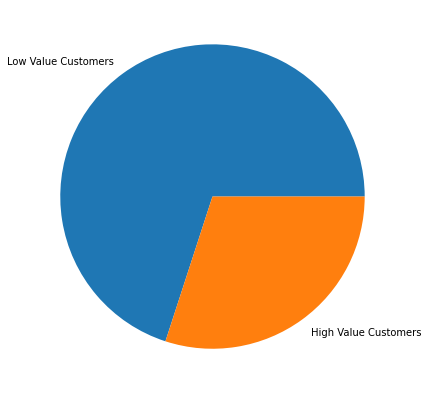

In [38]:
plt.figure(figsize =(7, 7))
plt.pie(df['avg_overall_usage_high'].value_counts(1), labels = ['Low Value Customers', 'High Value Customers'])
plt.show()

<b>As we can see here 30% are our high value customers.</b>

In [39]:
# dropping all rows of low value customer
df.drop(df[df['avg_overall_usage_high'] == False].index, inplace = True)

In [40]:
df.head()

mobile_number    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0      7000842753   197.385   214.816   213.803   21.100          NaN   
7      7000701601  1069.180  1349.850  3171.480  500.000        57.84   
8      7001524846   378.721   492.223   137.362  166.787       413.69   
21     7002124215   514.453   597.753   637.760  578.596       102.41   
23     7000887461    74.350   193.897   366.966  811.480        48.96   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0           NaN         0.00          NaN           NaN           NaN   
7         54.68        52.29          NaN        453.43        567.16   
8        351.03        35.08        33.46         94.66         80.63   
21       132.11        85.14       161.63        757.93        896.68   
23        50.66        33.58        15.74         85.41         89.36   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           0.00           NaN            NaN            NaN           0.00   
7         325.91           NaN          16.23          33.49          31.64   
8         136.48        108.71           0.00           0.00           0.00   
21        983.39        869.89           0.00           0.00           0.00   
23        205.89        111.88           0.00           0.00           0.00   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0             NaN            NaN            NaN           0.00            NaN   
7             NaN          23.74          12.59          38.06            NaN   
8             0.0           0.00           0.00           0.00            0.0   
21            0.0           0.00           0.00           0.00            0.0   
23            0.0           0.00           0.00           0.00            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0                NaN               NaN              0.00               NaN   
7              51.39             31.38             40.28               NaN   
8             297.13            217.59             12.49             26.13   
21              4.48              6.16             23.34             29.98   
23             48.96             50.66             33.58             15.74   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0                NaN               NaN              0.00               NaN   
7             308.63            447.38            162.28               NaN   
8              80.96             70.58             50.54             34.58   
21             91.81             87.93            104.81            107.54   
23             82.94             83.01            148.56             83.73   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0                NaN               NaN              0.00               NaN   
7              62.13             55.14             53.23               NaN   
8               0.00              0.00              0.00              0.00   
21              0.75              0.00              1.58              0.00   
23              0.00              0.00              0.00              2.45   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0                NaN               NaN              0.00               NaN   
7                0.0               0.0              0.00               NaN   
8                0.0               0.0              7.15              0.00   
21               0.0               0.0              0.00              0.00   
23               0.0               0.0             17.71              4.08   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0            NaN           NaN          0.00           NaN               NaN   
7         422.16        533.91        255.79           NaN              4.30   
8         378.09        288.18         63.04    

In [41]:
df.shape

(30001, 187)

In [42]:
# Dropping the average overall_usage_high column
df.drop(['avg_overall_usage_high'], axis = 1, inplace = True)

In [43]:
# Checking the Churn rate in the high value customers
round(df['churn'].value_counts(1)*100,2)

0    91.86
1     8.14
Name: churn, dtype: float64

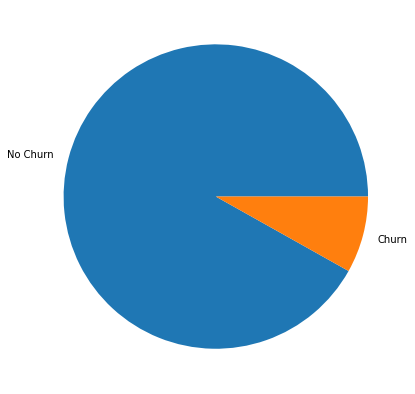

In [44]:
plt.figure(figsize =(7, 7))
plt.pie(df['churn'].value_counts(1), labels = ['No Churn', 'Churn'])
plt.show()

<b>We can see here that around 8.14% people from our high value customer have churned</b>

In [45]:
# Checking the number of columns for the 9th month
print(df.columns.str.endswith('_9').sum())

44


In [46]:
# Dropping all the columns related to the 9th month to prevent data leakage
df = df.drop([col for col in df.columns if col.endswith('_9')],axis=1)

In [47]:
df.shape

(30001, 142)

In [48]:
df.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0      7000842753   197.385   214.816   213.803          NaN          NaN   
7      7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8      7001524846   378.721   492.223   137.362       413.69       351.03   
21     7002124215   514.453   597.753   637.760       102.41       132.11   
23     7000887461    74.350   193.897   366.966        48.96        50.66   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0          0.00           NaN           NaN          0.00            NaN   
7         52.29        453.43        567.16        325.91          16.23   
8         35.08         94.66         80.63        136.48           0.00   
21        85.14        757.93        896.68        983.39           0.00   
23        33.58         85.41         89.36        205.89           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0             NaN           0.00            NaN            NaN           0.00   
7           33.49          31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0                NaN               NaN              0.00               NaN   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0                NaN              0.00               NaN               NaN   
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               NaN               NaN              0.00   
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0             17.71   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0            NaN           NaN          0.00               NaN   
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
21         97.04         94.09        129.74             97.93   
23        131.91        133.68        182.14              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0                NaN              0.00               NaN               NaN   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
21            125.94             61.79            665.36            808.74   
23              0.00              0.00              2.36              6.35   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00               NaN               NaN              0.00   
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
21          

In [49]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 142 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   mobile_number              int64         
 1   arpu_6                     float64       
 2   arpu_7                     float64       
 3   arpu_8                     float64       
 4   onnet_mou_6                float64       
 5   onnet_mou_7                float64       
 6   onnet_mou_8                float64       
 7   offnet_mou_6               float64       
 8   offnet_mou_7               float64       
 9   offnet_mou_8               float64       
 10  roam_ic_mou_6              float64       
 11  roam_ic_mou_7              float64       
 12  roam_ic_mou_8              float64       
 13  roam_og_mou_6              float64       
 14  roam_og_mou_7              float64       
 15  roam_og_mou_8              float64       
 16  loc_og_t2t_mou_6           float64     

In [50]:
round((df.isnull().sum()/len(df))*100,2).sort_values(ascending = False)

og_others_8                  3.91
std_ic_t2f_mou_8             3.91
std_og_t2m_mou_8             3.91
isd_og_mou_8                 3.91
std_og_t2t_mou_8             3.91
ic_others_8                  3.91
loc_og_mou_8                 3.91
isd_ic_mou_8                 3.91
loc_og_t2c_mou_8             3.91
spl_ic_mou_8                 3.91
loc_og_t2f_mou_8             3.91
spl_og_mou_8                 3.91
loc_og_t2m_mou_8             3.91
std_ic_mou_8                 3.91
std_og_t2f_mou_8             3.91
loc_og_t2t_mou_8             3.91
std_og_mou_8                 3.91
loc_ic_t2m_mou_8             3.91
std_ic_t2m_mou_8             3.91
std_ic_t2t_mou_8             3.91
roam_ic_mou_8                3.91
loc_ic_mou_8                 3.91
offnet_mou_8                 3.91
loc_ic_t2t_mou_8             3.91
loc_ic_t2f_mou_8             3.91
roam_og_mou_8                3.91
onnet_mou_8                  3.91
date_of_last_rech_8          1.94
std_ic_t2f_mou_6             1.82
isd_og_mou_6  

In [51]:
# Removing the rows where Date is null
df = df[~(df['date_of_last_rech_6'].isnull())]
df = df[~(df['date_of_last_rech_7'].isnull())]
df = df[~(df['date_of_last_rech_8'].isnull())]

In [52]:
# Here we can see this feature is unique so lets use it as a key
df['mobile_number'].nunique()

29309

In [53]:
# Creating another dataframe which contain date with unique key
df2 = df[['mobile_number', 'date_of_last_rech_6', 'date_of_last_rech_7' , 'date_of_last_rech_8']]

In [54]:
# dropping the date columns from the main dataframe 
df.drop(['date_of_last_rech_6', 'date_of_last_rech_7','date_of_last_rech_8'],axis = 1, inplace = True)

In [55]:
# Imputing the value by the median
df = df.apply(lambda x: x.fillna(x.median()),axis=0)

In [56]:
# merging both dataframe using the unique key
df = df.merge(df2, how='inner', on='mobile_number')

In [57]:
# Again checking if any missing value is left or not
round((df.isnull().sum()/len(df))*100,2).sort_values(ascending = False)

date_of_last_rech_8          0.0
isd_og_mou_7                 0.0
og_others_7                  0.0
og_others_6                  0.0
spl_og_mou_8                 0.0
spl_og_mou_7                 0.0
spl_og_mou_6                 0.0
isd_og_mou_8                 0.0
isd_og_mou_6                 0.0
total_og_mou_6               0.0
std_og_mou_8                 0.0
std_og_mou_7                 0.0
std_og_mou_6                 0.0
std_og_t2f_mou_8             0.0
std_og_t2f_mou_7             0.0
std_og_t2f_mou_6             0.0
og_others_8                  0.0
total_og_mou_7               0.0
std_og_t2m_mou_7             0.0
loc_ic_t2f_mou_7             0.0
std_ic_t2t_mou_7             0.0
std_ic_t2t_mou_6             0.0
loc_ic_mou_8                 0.0
loc_ic_mou_7                 0.0
loc_ic_mou_6                 0.0
loc_ic_t2f_mou_8             0.0
loc_ic_t2f_mou_6             0.0
total_og_mou_8               0.0
loc_ic_t2m_mou_8             0.0
loc_ic_t2m_mou_7             0.0
loc_ic_t2m

Here we can see we have no more missing value in our data now we can go ahead and do further analysis.

In [58]:
df.shape

(29309, 142)

### Data Analysis

In [59]:
df.corr()

mobile_number    arpu_6    arpu_7    arpu_8  \
mobile_number                   1.000000  0.035113  0.030873  0.034622   
arpu_6                          0.035113  1.000000  0.702861  0.645882   
arpu_7                          0.030873  0.702861  1.000000  0.770929   
arpu_8                          0.034622  0.645882  0.770929  1.000000   
onnet_mou_6                     0.010135  0.346723  0.213680  0.153126   
onnet_mou_7                     0.005147  0.225708  0.317376  0.229767   
onnet_mou_8                     0.007502  0.197513  0.267805  0.338570   
offnet_mou_6                    0.023021  0.519761  0.357139  0.284391   
offnet_mou_7                    0.011902  0.357330  0.486946  0.374444   
offnet_mou_8                    0.017800  0.308013  0.393084  0.513558   
roam_ic_mou_6                   0.010269  0.128234  0.094301  0.090288   
roam_ic_mou_7                  -0.002011  0.087800  0.094484  0.078913   
roam_ic_mou_8                   0.005075  0.093846  0.093648  0.109758   
roam_og_mou_6                   0.005808  0.195953  0.136235  0.132806   
roam_og_mou_7                  -0.001024  0.148404  0.180422  0.141980   
roam_og_mou_8                  -0.002658  0.130035  0.152220  0.198731   
loc_og_t2t_mou_6                0.046326  0.169819  0.106666  0.100851   
loc_og_t2t_mou_7                0.044348  0.132984  0.155463  0.130293   
loc_og_t2t_mou_8                0.044018  0.129503  0.133011  0.172458   
loc_og_t2m_mou_6                0.078489  0.339127  0.218538  0.215983   
loc_og_t2m_mou_7                0.075673  0.258004  0.298807  0.264643   
loc_og_t2m_mou_8                0.079704  0.235993  0.250984  0.343738   
loc_og_t2f_mou_6                0.050433  0.144402  0.114328  0.120614   
loc_og_t2f_mou_7                0.052306  0.119921  0.141876  0.133432   
loc_og_t2f_mou_8                0.057053  0.111072  0.123452  0.156788   
loc_og_t2c_mou_6               -0.013098  0.047003  0.009811  0.001702   
loc_og_t2c_mou_7               -0.014868  0.010171  0.040588  0.019952   
loc_og_t2c_mou_8               -0.006533  0.011899  0.031497  0.052955   
loc_og_mou_6                    0.082667  0.334537  0.215388  0.210481   
loc_og_mou_7                    0.079922  0.258138  0.299741  0.261204   
loc_og_mou_8                    0.081636  0.239022  0.250798  0.336349   
std_og_t2t_mou_6               -0.015380  0.278589  0.168716  0.104149   
std_og_t2t_mou_7               -0.019598  0.168903  0.258765  0.176210   
std_og_t2t_mou_8               -0.015205  0.141927  0.218997  0.274419   
std_og_t2m_mou_6               -0.022676  0.308696  0.205114  0.122324   
std_og_t2m_mou_7               -0.028005  0.191229  0.305275  0.204541   
std_og_t2m_mou_8               -0.024902  0.151195  0.237560  0.317539   
std_og_t2f_mou_6                0.024381  0.068969  0.055687  0.057019   
std_og_t2f_mou_7                0.017654  0.057299  0.071882  0.068629   
std_og_t2f_mou_8                0.021731  0.046701  0.054297  0.069662   
std_og_mou_6                   -0.025181  0.393831  0.251172  0.152502   
std_og_mou_7                   -0.031786  0.242097  0.378752  0.256000   
std_og_mou_8                   -0.026512  0.195502  0.303890  0.393950   
isd_og_mou_6                   -0.002224  0.454410  0.429097  0.409783   
isd_og_mou_7                   -0.002087  0.432929  0.514246  0.444901   
isd_og_mou_8                   -0.003851  0.426974  0.457355  0.459625   
spl_og_mou_6                   -0.019682  0.124620  0.069517  0.102903   
spl_og_mou_7                   -0.021160  0.071043  0.113813  0.124188   
spl_og_mou_8                   -0.013442  0.047497  0.067797  0.103017   
og_others_6                    -0.006528  0.054928  0.018125  0.013396   
og_others_7                    -0.000985  0.025175  0.026276  0.015711   
og_others_8                     0.000603  0.016028  0.017906  0.012207   
total_og_mou_6                  0.023399  0.567583  0.370938  0.280997   
total_og_mou_7                 

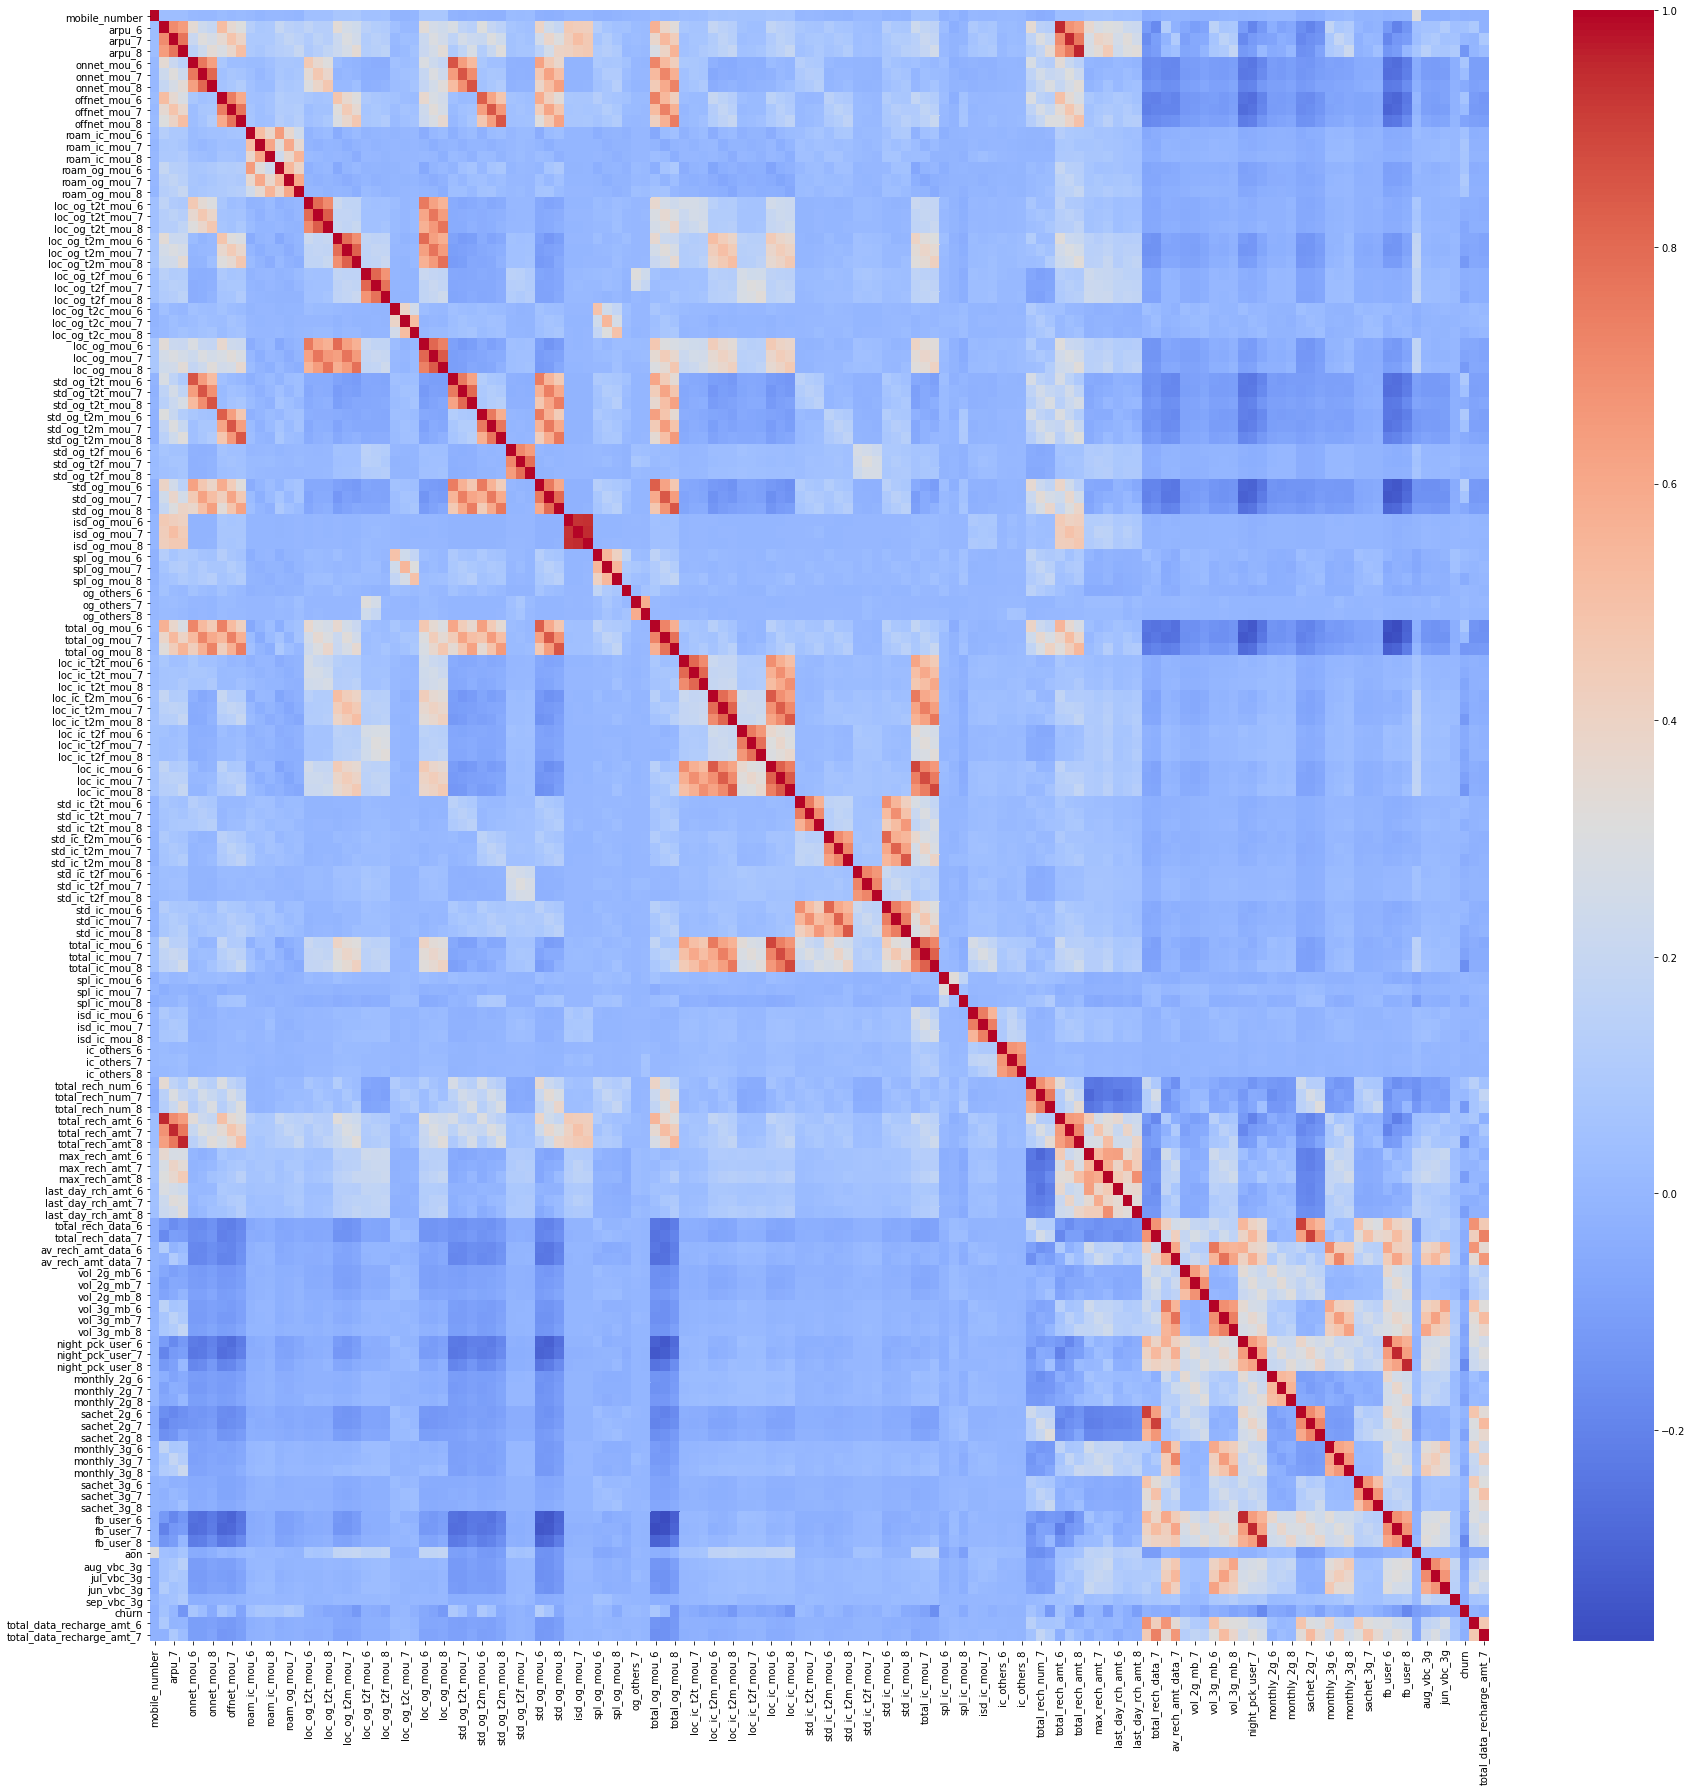

In [60]:
# Lets see the correlation matrix
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),  cmap= 'coolwarm')
plt.show()

<b>From here we can see there are few areas which have a strong correlation amongst each other and only a few have correlation with our target variable. To avoid multicolinearity we will use PCA.</b>

In [61]:
# Let's see how much correlation is there between the target variable and independent variables
round(df.corrwith(df.churn).sort_values(ascending=False),2)

churn                        1.00
std_og_mou_6                 0.13
roam_og_mou_7                0.10
std_og_t2m_mou_6             0.10
std_og_t2t_mou_6             0.10
total_og_mou_6               0.08
roam_og_mou_8                0.08
onnet_mou_6                  0.08
roam_ic_mou_7                0.07
roam_ic_mou_8                0.07
std_og_mou_7                 0.07
offnet_mou_6                 0.07
roam_og_mou_6                0.06
total_rech_num_6             0.06
total_rech_amt_6             0.05
std_og_t2m_mou_7             0.05
arpu_6                       0.05
roam_ic_mou_6                0.05
std_og_t2t_mou_7             0.05
onnet_mou_7                  0.03
std_ic_t2t_mou_6             0.02
spl_og_mou_6                 0.02
offnet_mou_7                 0.02
og_others_7                  0.02
total_og_mou_7               0.02
std_ic_mou_6                 0.01
og_others_6                  0.01
total_rech_num_7             0.01
og_others_8                  0.01
sachet_3g_6   

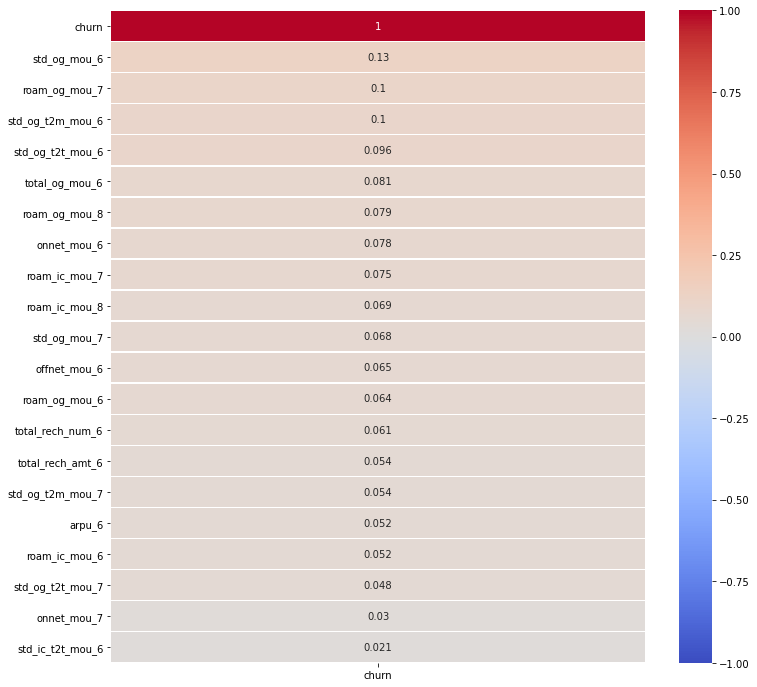

In [62]:
# Looking at top 20 most correlated features with our target variable
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr()[['churn']].sort_values('churn').tail(21),vmax=1,vmin=-1,linewidths=.5, cmap='coolwarm', annot=True, ax=ax);
ax.invert_yaxis()

In [63]:
df.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0     7000842753   197.385   214.816   213.803        89.21        88.36   
1     7000701601  1069.180  1349.850  3171.480        57.84        54.68   
2     7001524846   378.721   492.223   137.362       413.69       351.03   
3     7002124215   514.453   597.753   637.760       102.41       132.11   
4     7000887461    74.350   193.897   366.966        48.96        50.66   

   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0         0.00        229.44        228.73          0.00           0.00   
1        52.29        453.43        567.16        325.91          16.23   
2        35.08         94.66         80.63        136.48           0.00   
3        85.14        757.93        896.68        983.39           0.00   
4        33.58         85.41         89.36        205.89           0.00   

   roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00           0.00           0.00           0.00   
1          33.49          31.64          23.74          12.59          38.06   
2           0.00           0.00           0.00           0.00           0.00   
3           0.00           0.00           0.00           0.00           0.00   
4           0.00           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0             25.63             26.06              0.00             80.21   
1             51.39             31.38             40.28            308.63   
2            297.13            217.59             12.49             80.96   
3              4.48              6.16             23.34             91.81   
4             48.96             50.66             33.58             82.94   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             82.11              0.00              0.11              0.21   
1            447.38            162.28             62.13             55.14   
2             70.58             50.54              0.00              0.00   
3             87.93            104.81              0.75              0.00   
4             83.01            148.56              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               0.0               0.0              0.00   
1             53.23               0.0               0.0              0.00   
2              0.00               0.0               0.0              7.15   
3              1.58               0.0               0.0              0.00   
4              0.00               0.0               0.0             17.71   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0        129.24        133.59          0.00              3.51   
1        422.16        533.91        255.79              4.30   
2        378.09        288.18         63.04            116.56   
3         97.04         94.09        129.74             97.93   
4        131.91        133.68        182.14              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0              3.48              0.00             18.41             18.14   
1             23.29             12.01             49.89             31.76   
2            133.43             22.58             13.69             10.04   
3            125.94             61.79            665.36            808.74   
4              0.00              0.00              2.36              6.35   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
1             49.14              6.66             20.08             16.68   
2             75.69              0.00              0.00              0.00   
3            876.99              0.00              0.00        

#### Univariate Analysis

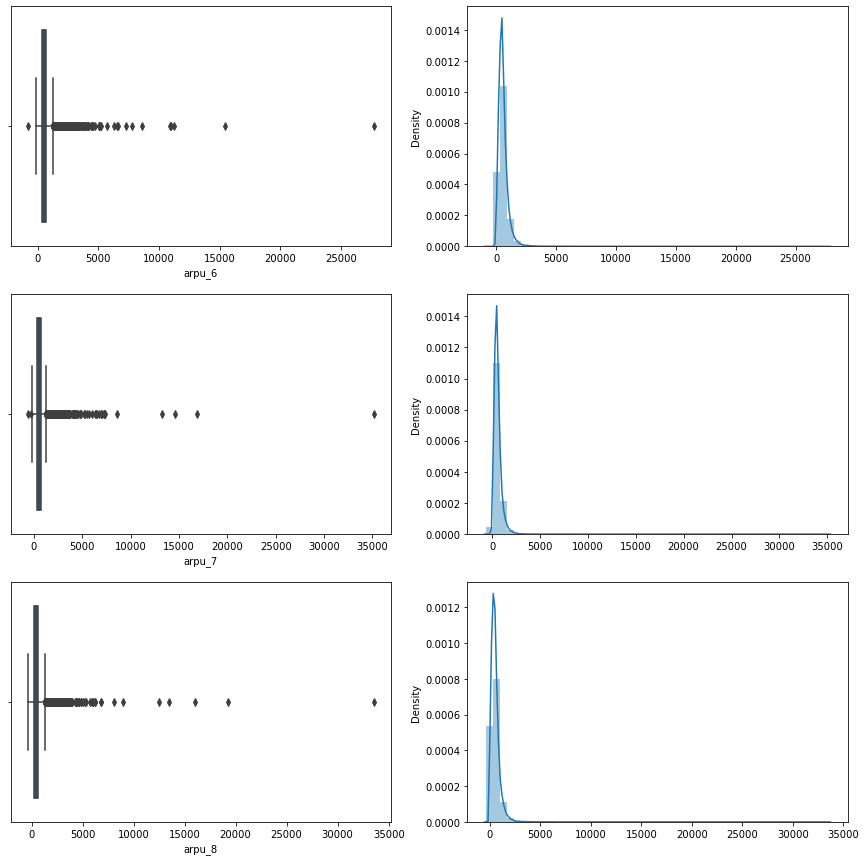

In [64]:
# Average Revenue per user
fig, axes = plt.subplots(3, 2, sharex=False, figsize=(15,15))
sns.boxplot(ax=axes[0,0], x='arpu_6' ,data=df)
sns.distplot(ax=axes[0,1], x=df.arpu_6)
sns.boxplot(ax=axes[1,0], x='arpu_7' ,data=df)
sns.distplot(ax=axes[1,1], x=df.arpu_7)
sns.boxplot(ax=axes[2,0], x='arpu_8' ,data=df)
sns.distplot(ax=axes[2,1], x=df.arpu_8)
plt.show()

<b>The above graph are highly skewed towards the left so let's do some outliers treatment.</b>

In [65]:
# Using Z score method for removing outliers
z = np.abs(stats.zscore(df.arpu_6))

# Setting the threshold value
threshold = 3

# Selecting only those value which are under our threshold others are dropped
df = df[(z < 3)]
df.shape

(28992, 142)

In [66]:
# Using Z score method for removing outliers
z = np.abs(stats.zscore(df.arpu_7))

# Setting the threshold value
threshold = 3

# Selecting only those value which are under our threshold others are dropped
df = df[(z < 3)]
df.shape

(28596, 142)

In [67]:
# Using Z score method for removing outliers
z = np.abs(stats.zscore(df.arpu_8))

# Setting the threshold value
threshold = 3

# Selecting only those value which are under our threshold others are dropped
df = df[(z < 3)]
df.shape

(28205, 142)

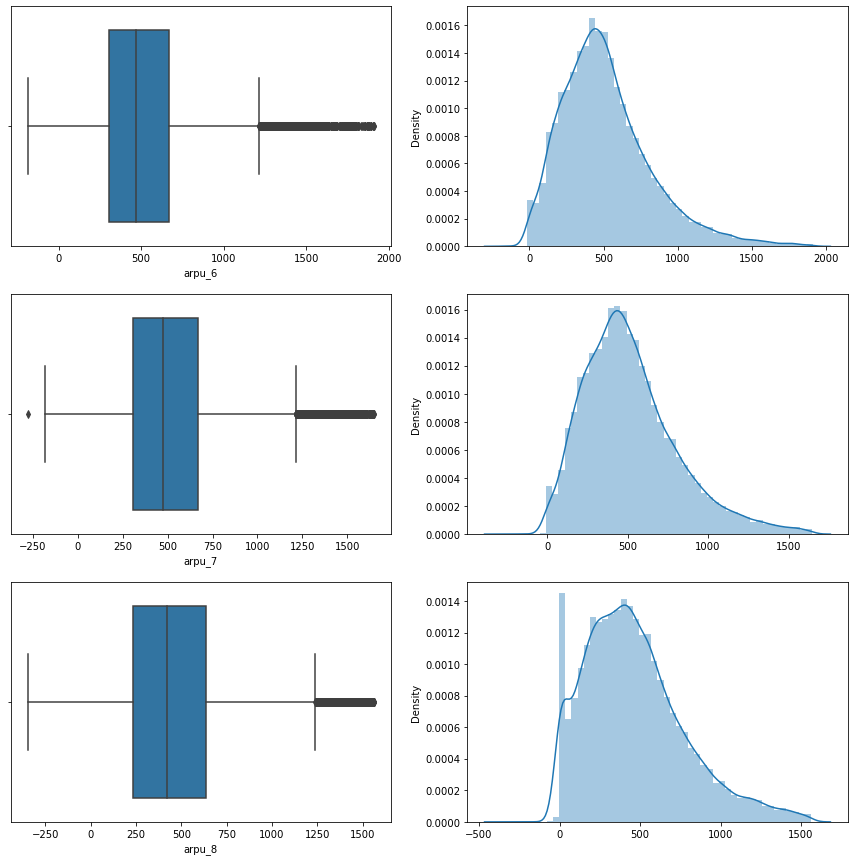

In [68]:
# Average Revenue per user after outlier tratment
fig, axes = plt.subplots(3, 2, sharex=False, figsize=(15,15))
sns.boxplot(ax=axes[0,0], x='arpu_6' ,data=df)
sns.distplot(ax=axes[0,1], x=df.arpu_6)
sns.boxplot(ax=axes[1,0], x='arpu_7' ,data=df)
sns.distplot(ax=axes[1,1], x=df.arpu_7)
sns.boxplot(ax=axes[2,0], x='arpu_8' ,data=df)
sns.distplot(ax=axes[2,1], x=df.arpu_8)
plt.show()

In [69]:
df[['arpu_6' ,'arpu_7', 'arpu_8']].describe()

arpu_6        arpu_7        arpu_8
count  28205.000000  28205.000000  28205.000000
mean     517.712347    516.731753    465.995188
std      305.138172    293.321284    311.721989
min     -185.043000   -275.799000   -345.129000
25%      306.010000    307.967000    235.314000
50%      472.251000    472.456000    422.454000
75%      670.301000    670.922000    637.115000
max     1910.306000   1646.911000   1561.988000

<b> Now after the outlier treatment wee can see the average revenue per user is around 517 to 516 and we can also see the people are spending less in the 8th month.</b>

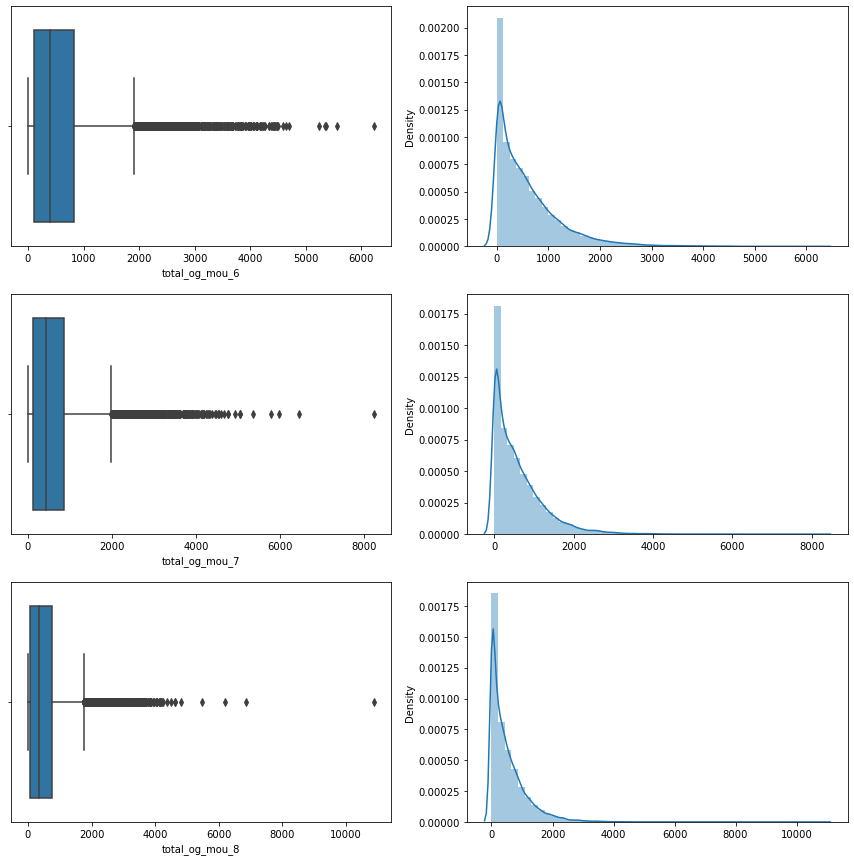

In [70]:
# Total Outgoing Calls
fig, axes = plt.subplots(3, 2, sharex=False, figsize=(15,15))
sns.boxplot(ax=axes[0,0], x='total_og_mou_6' ,data=df)
sns.distplot(ax=axes[0,1], x=df.total_og_mou_6)
sns.boxplot(ax=axes[1,0], x='total_og_mou_7' ,data=df)
sns.distplot(ax=axes[1,1], x=df.total_og_mou_7)
sns.boxplot(ax=axes[2,0], x='total_og_mou_8' ,data=df)
sns.distplot(ax=axes[2,1], x=df.total_og_mou_8)
plt.show()

<b>The above graph are highly skewed towards the left so let's do some outliers treatment.</b>

In [71]:
# Using Z score method for removing outliers
z = np.abs(stats.zscore(df.total_og_mou_6))

# Setting the threshold value
threshold = 3

# Selecting only those value which are under our threshold others are dropped
df = df[(z < 3)]
df.shape

(27704, 142)

In [72]:
# Using Z score method for removing outliers
z = np.abs(stats.zscore(df.total_og_mou_7))

# Setting the threshold value
threshold = 3

# Selecting only those value which are under our threshold others are dropped
df = df[(z < 3)]
df.shape

(27282, 142)

In [73]:
# Using Z score method for removing outliers
z = np.abs(stats.zscore(df.total_og_mou_8))

# Setting the threshold value
threshold = 3

# Selecting only those value which are under our threshold others are dropped
df = df[(z < 3)]
df.shape

(26849, 142)

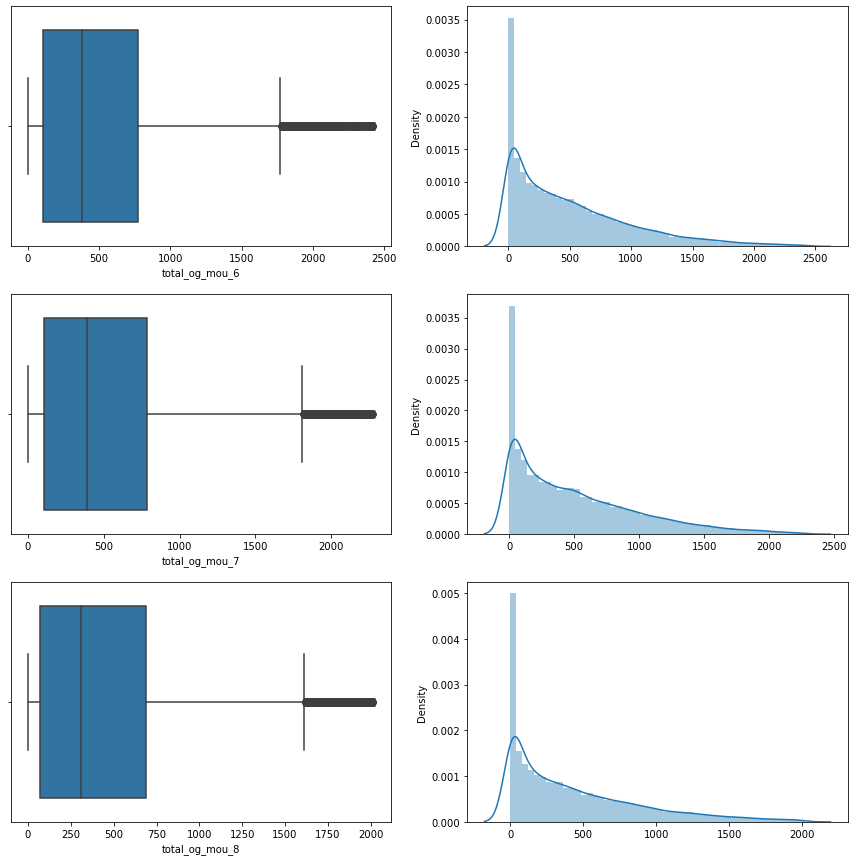

In [74]:
# Total Outgoing Calls after treating outliers
fig, axes = plt.subplots(3, 2, sharex=False, figsize=(15,15))
sns.boxplot(ax=axes[0,0], x='total_og_mou_6' ,data=df)
sns.distplot(ax=axes[0,1], x=df.total_og_mou_6)
sns.boxplot(ax=axes[1,0], x='total_og_mou_7' ,data=df)
sns.distplot(ax=axes[1,1], x=df.total_og_mou_7)
sns.boxplot(ax=axes[2,0], x='total_og_mou_8' ,data=df)
sns.distplot(ax=axes[2,1], x=df.total_og_mou_8)
plt.show()

In [75]:
df[['total_og_mou_6' ,'total_og_mou_7', 'total_og_mou_8']].describe()

total_og_mou_6  total_og_mou_7  total_og_mou_8
count    26849.000000    26849.000000    26849.000000
mean       511.821688      512.439372      443.871948
std        493.589273      484.728300      450.429063
min          0.000000        0.000000        0.000000
25%        107.210000      105.890000       70.510000
50%        378.380000      387.360000      308.080000
75%        772.860000      786.860000      686.310000
max       2429.240000     2280.780000     2017.740000

<b>We can see from the above graphs that the majority of the total outgoing is around 511-512 and here also we see the decline in the 8th month. </b>

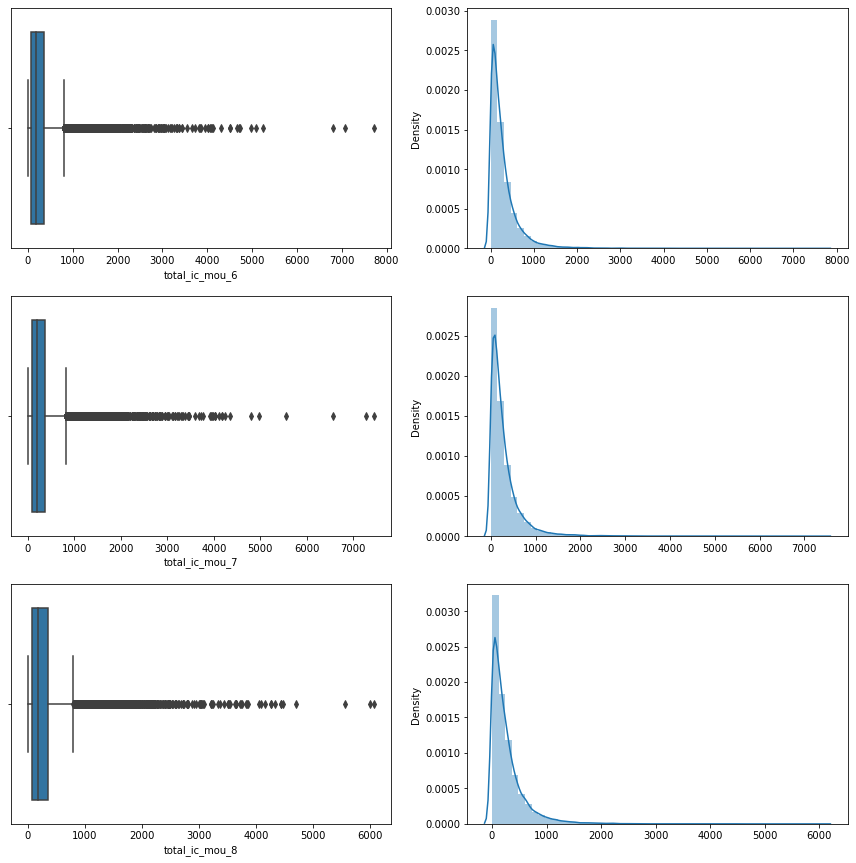

In [76]:
# Total Incoming Calls
fig, axes = plt.subplots(3, 2, sharex=False, figsize=(15,15))
sns.boxplot(ax=axes[0,0], x='total_ic_mou_6' ,data=df)
sns.distplot(ax=axes[0,1], x=df.total_ic_mou_6)
sns.boxplot(ax=axes[1,0], x='total_ic_mou_7' ,data=df)
sns.distplot(ax=axes[1,1], x=df.total_ic_mou_7)
sns.boxplot(ax=axes[2,0], x='total_ic_mou_8' ,data=df)
sns.distplot(ax=axes[2,1], x=df.total_ic_mou_8)
plt.show()

<b>The above graph are highly skewed towards the left so let's do some outliers treatment.</b>

In [77]:
# Using Z score method for removing outliers
z = np.abs(stats.zscore(df.total_ic_mou_6))

# Setting the threshold value
threshold = 3

# Selecting only those value which are under our threshold others are dropped
df = df[(z < 3)]
df.shape

(26357, 142)

In [78]:
# Using Z score method for removing outliers
z = np.abs(stats.zscore(df.total_ic_mou_7))

# Setting the threshold value
threshold = 3

# Selecting only those value which are under our threshold others are dropped
df = df[(z < 3)]
df.shape

(25870, 142)

In [79]:
# Using Z score method for removing outliers
z = np.abs(stats.zscore(df.total_ic_mou_8))

# Setting the threshold value
threshold = 3

# Selecting only those value which are under our threshold others are dropped
df = df[(z < 3)]
df.shape

(25450, 142)

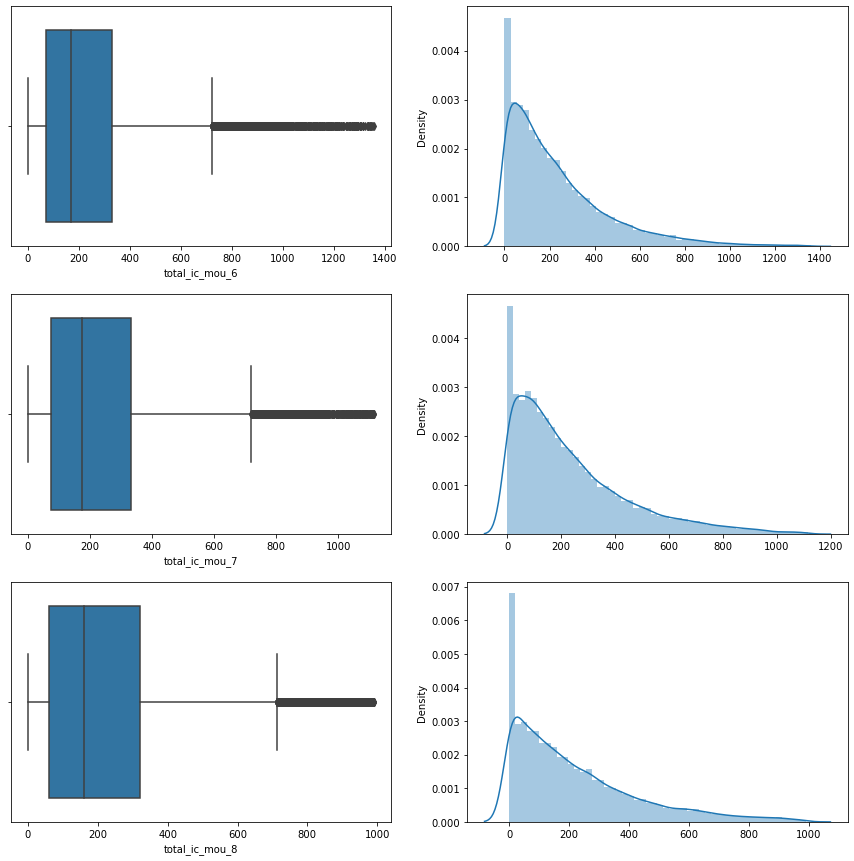

In [80]:
# Total Incoming Calls after outlier treatment
fig, axes = plt.subplots(3, 2, sharex=False, figsize=(15,15))
sns.boxplot(ax=axes[0,0], x='total_ic_mou_6' ,data=df)
sns.distplot(ax=axes[0,1], x=df.total_ic_mou_6)
sns.boxplot(ax=axes[1,0], x='total_ic_mou_7' ,data=df)
sns.distplot(ax=axes[1,1], x=df.total_ic_mou_7)
sns.boxplot(ax=axes[2,0], x='total_ic_mou_8' ,data=df)
sns.distplot(ax=axes[2,1], x=df.total_ic_mou_8)
plt.show()

In [81]:
df[['total_ic_mou_6' ,'total_ic_mou_7', 'total_ic_mou_8']].describe()

total_ic_mou_6  total_ic_mou_7  total_ic_mou_8
count    25450.000000    25450.000000    25450.000000
mean       233.745566      233.657062      220.272913
std        223.627403      213.166578      208.022364
min          0.000000        0.000000        0.000000
25%         68.810000       74.195000       58.890000
50%        169.400000      172.670000      160.575000
75%        329.725000      332.325000      320.332500
max       1357.860000     1114.510000      990.410000

<b>We can see from the above graphs that the majority of the total incoming is around 233 and here also we see the decline in the 8th month. </b>

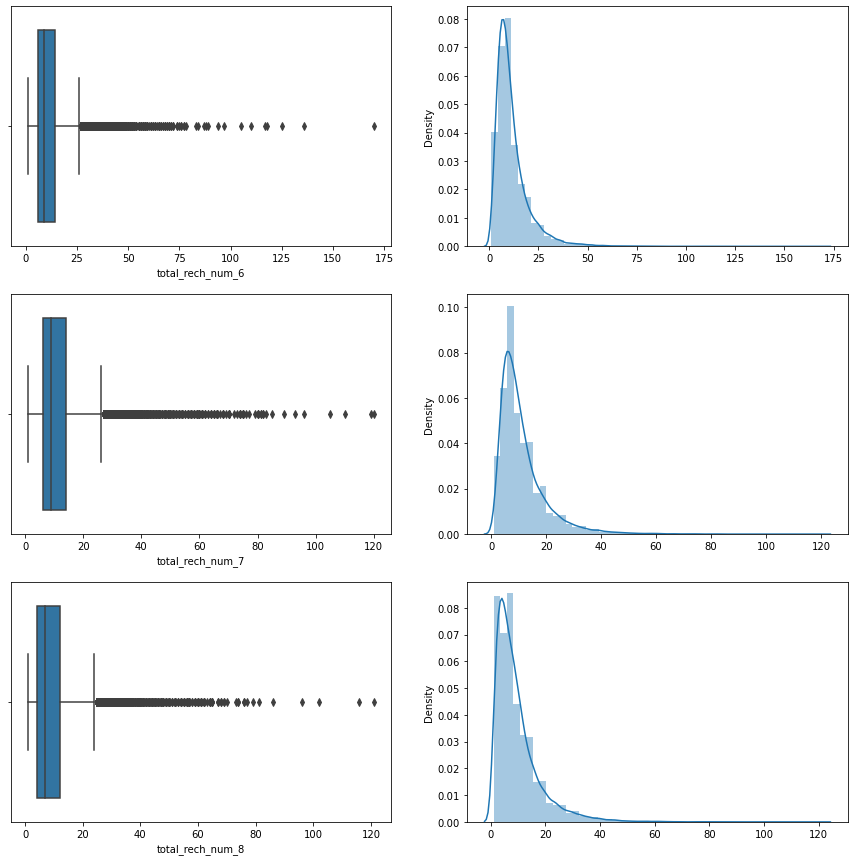

In [82]:
# Total Number of Recharge
fig, axes = plt.subplots(3, 2, sharex=False, figsize=(15,15))
sns.boxplot(ax=axes[0,0], x='total_rech_num_6' ,data=df)
sns.distplot(ax=axes[0,1], x=df.total_rech_num_6)
sns.boxplot(ax=axes[1,0], x='total_rech_num_7' ,data=df)
sns.distplot(ax=axes[1,1], x=df.total_rech_num_7)
sns.boxplot(ax=axes[2,0], x='total_rech_num_8' ,data=df)
sns.distplot(ax=axes[2,1], x=df.total_rech_num_8)
plt.show()

<b>The above graph are highly skewed towards the left so let's do some outliers treatment.</b>

In [83]:
# Using Z score method for removing outliers
z = np.abs(stats.zscore(df.total_rech_num_6))

# Setting the threshold value
threshold = 3

# Selecting only those value which are under our threshold others are dropped
df = df[(z < 3)]
df.shape

(24991, 142)

In [84]:
# Using Z score method for removing outliers
z = np.abs(stats.zscore(df.total_rech_num_7))

# Setting the threshold value
threshold = 3

# Selecting only those value which are under our threshold others are dropped
df = df[(z < 3)]
df.shape

(24548, 142)

In [85]:
# Using Z score method for removing outliers
z = np.abs(stats.zscore(df.total_rech_num_8))

# Setting the threshold value
threshold = 3

# Selecting only those value which are under our threshold others are dropped
df = df[(z < 3)]
df.shape

(24143, 142)

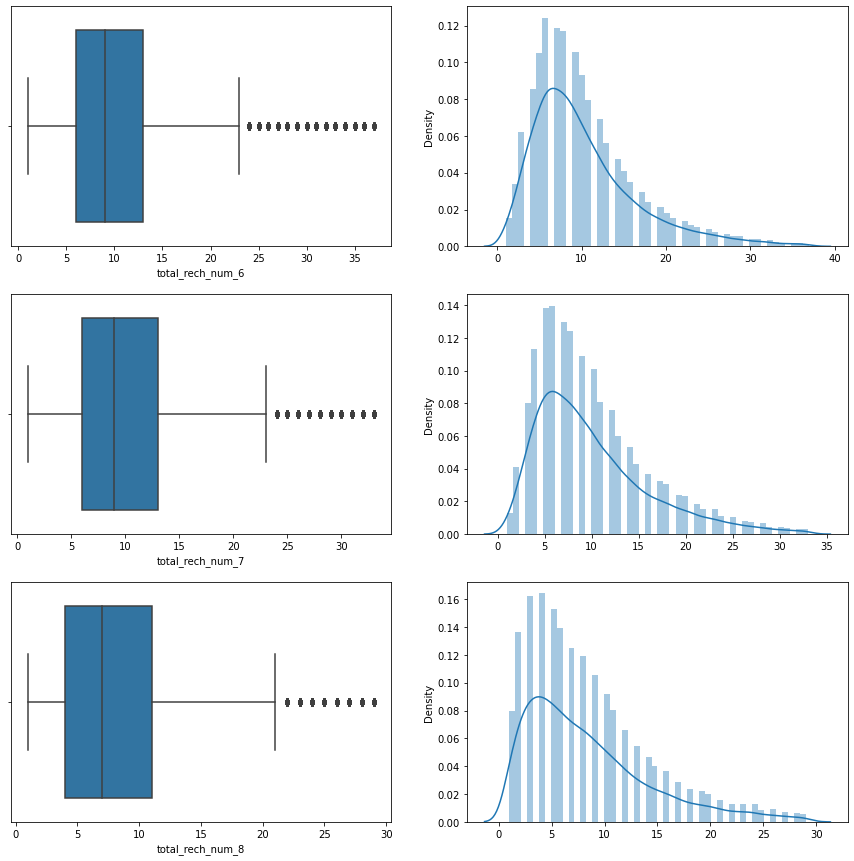

In [86]:
# Total Number of Recharge after outlier treatment
fig, axes = plt.subplots(3, 2, sharex=False, figsize=(15,15))
sns.boxplot(ax=axes[0,0], x='total_rech_num_6' ,data=df)
sns.distplot(ax=axes[0,1], x=df.total_rech_num_6)
sns.boxplot(ax=axes[1,0], x='total_rech_num_7' ,data=df)
sns.distplot(ax=axes[1,1], x=df.total_rech_num_7)
sns.boxplot(ax=axes[2,0], x='total_rech_num_8' ,data=df)
sns.distplot(ax=axes[2,1], x=df.total_rech_num_8)
plt.show()

In [87]:
df[['total_rech_num_6' ,'total_rech_num_7', 'total_rech_num_8']].describe()

total_rech_num_6  total_rech_num_7  total_rech_num_8
count      24143.000000      24143.000000      24143.000000
mean          10.270637          9.978047          8.371619
std            6.266675          6.053008          5.867767
min            1.000000          1.000000          1.000000
25%            6.000000          6.000000          4.000000
50%            9.000000          9.000000          7.000000
75%           13.000000         13.000000         11.000000
max           37.000000         33.000000         29.000000

<b>We can see from the above graphs that the majority of the total number of recharge is around 10 and here also we see the decline in the 8th month. </b>

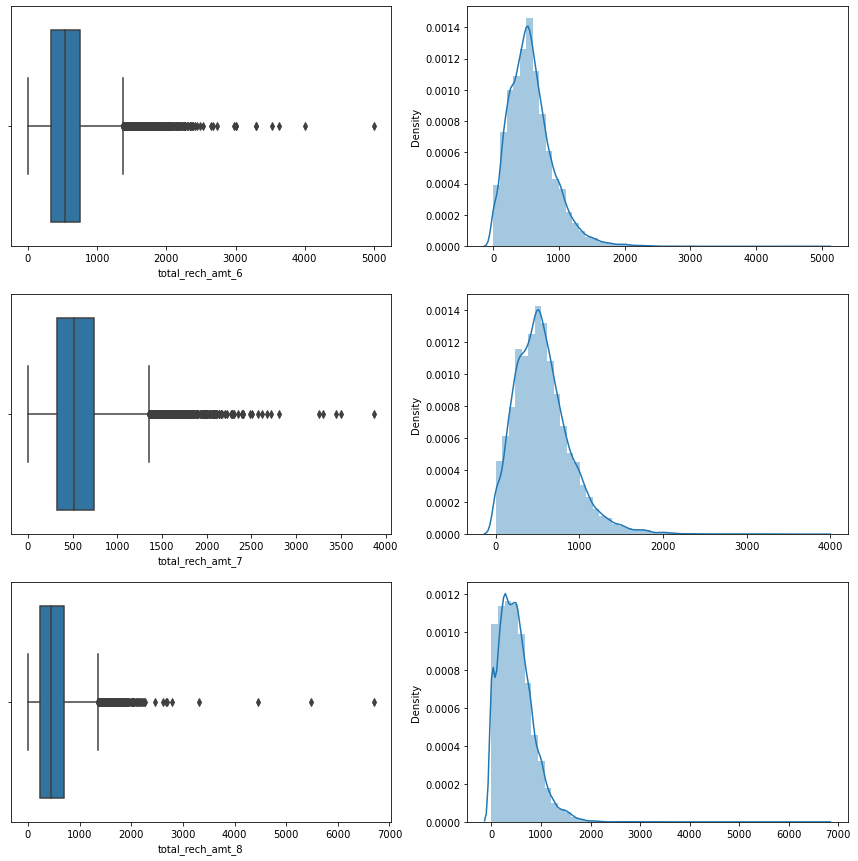

In [88]:
# Total Recharge Amount
fig, axes = plt.subplots(3, 2, sharex=False, figsize=(15,15))
sns.boxplot(ax=axes[0,0], x='total_rech_amt_6' ,data=df)
sns.distplot(ax=axes[0,1], x=df.total_rech_amt_6)
sns.boxplot(ax=axes[1,0], x='total_rech_amt_7' ,data=df)
sns.distplot(ax=axes[1,1], x=df.total_rech_amt_7)
sns.boxplot(ax=axes[2,0], x='total_rech_amt_8' ,data=df)
sns.distplot(ax=axes[2,1], x=df.total_rech_amt_8)
plt.show()

<b>The above graph are highly skewed towards the left so let's do some outliers treatment.</b>

In [89]:
# Using Z score method for removing outliers
z = np.abs(stats.zscore(df.total_rech_amt_6))

# Setting the threshold value
threshold = 3

# Selecting only those value which are under our threshold others are dropped
df = df[(z < 3)]
df.shape

(23875, 142)

In [90]:
# Using Z score method for removing outliers
z = np.abs(stats.zscore(df.total_rech_amt_7))

# Setting the threshold value
threshold = 3

# Selecting only those value which are under our threshold others are dropped
df = df[(z < 3)]
df.shape

(23611, 142)

In [91]:
# Using Z score method for removing outliers
z = np.abs(stats.zscore(df.total_rech_amt_8))

# Setting the threshold value
threshold = 3

# Selecting only those value which are under our threshold others are dropped
df = df[(z < 3)]
df.shape

(23368, 142)

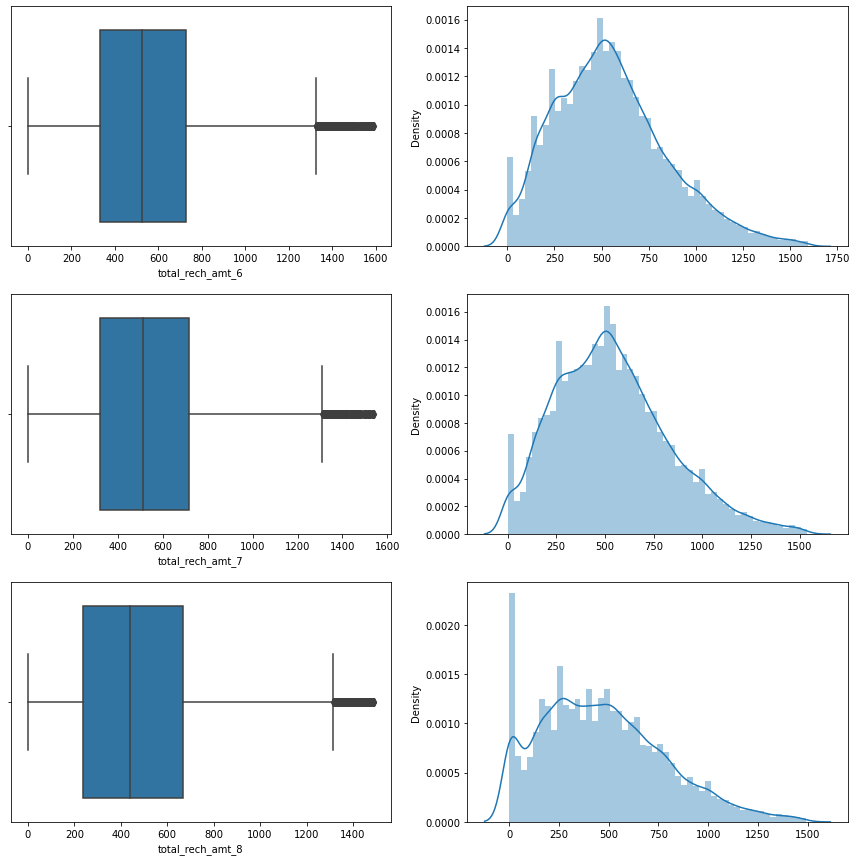

In [92]:
# Total Recharge Amount after outlier treatment
fig, axes = plt.subplots(3, 2, sharex=False, figsize=(15,15))
sns.boxplot(ax=axes[0,0], x='total_rech_amt_6' ,data=df)
sns.distplot(ax=axes[0,1], x=df.total_rech_amt_6)
sns.boxplot(ax=axes[1,0], x='total_rech_amt_7' ,data=df)
sns.distplot(ax=axes[1,1], x=df.total_rech_amt_7)
sns.boxplot(ax=axes[2,0], x='total_rech_amt_8' ,data=df)
sns.distplot(ax=axes[2,1], x=df.total_rech_amt_8)
plt.show()

In [93]:
df[['total_rech_amt_6' ,'total_rech_amt_7', 'total_rech_amt_8']].describe()

total_rech_amt_6  total_rech_amt_7  total_rech_amt_8
count      23368.000000      23368.000000      23368.000000
mean         551.722740        540.182429        470.552379
std          300.643694        295.125670        311.279357
min            0.000000          0.000000          0.000000
25%          332.000000        320.000000        236.000000
50%          523.000000        510.000000        440.000000
75%          729.000000        716.000000        667.000000
max         1592.000000       1540.000000       1490.000000

<b>We can see from the above graphs that the majority of the total number of recharge amount is around 540-550 and here also we see the decline in the 8th month. </b>

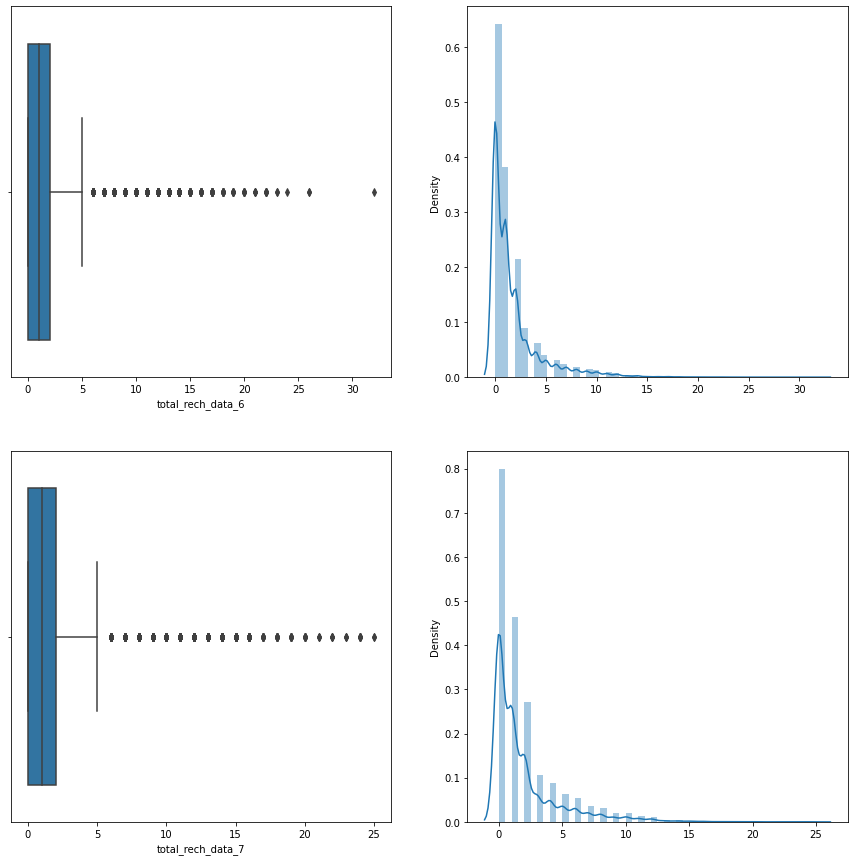

In [94]:
# Total Data Recharge
fig, axes = plt.subplots(2, 2, sharex=False, figsize=(15,15))
sns.boxplot(ax=axes[0,0], x='total_rech_data_6' ,data=df)
sns.distplot(ax=axes[0,1], x=df.total_rech_data_6)
sns.boxplot(ax=axes[1,0], x='total_rech_data_7' ,data=df)
sns.distplot(ax=axes[1,1], x=df.total_rech_data_7)
plt.show()

<b>The above graph are highly skewed towards the left so let's do some outliers treatment.</b>

In [95]:
# Using Z score method for removing outliers
z = np.abs(stats.zscore(df.total_rech_data_6))

# Setting the threshold value
threshold = 3

# Selecting only those value which are under our threshold others are dropped
df = df[(z < 3)]
df.shape

(22737, 142)

In [96]:
# Using Z score method for removing outliers
z = np.abs(stats.zscore(df.total_rech_data_7))

# Setting the threshold value
threshold = 3

# Selecting only those value which are under our threshold others are dropped
df = df[(z < 3)]
df.shape

(22261, 142)

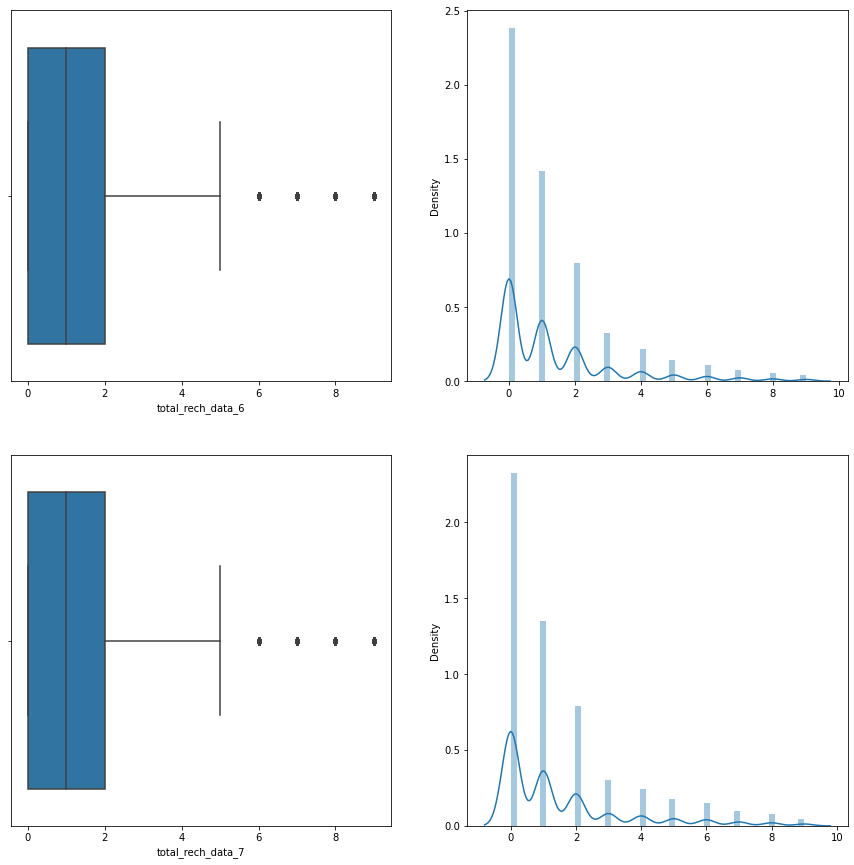

In [97]:
# Total Data Recharge after outlier treatment
fig, axes = plt.subplots(2, 2, sharex=False, figsize=(15,15))
sns.boxplot(ax=axes[0,0], x='total_rech_data_6' ,data=df)
sns.distplot(ax=axes[0,1], x=df.total_rech_data_6)
sns.boxplot(ax=axes[1,0], x='total_rech_data_7' ,data=df)
sns.distplot(ax=axes[1,1], x=df.total_rech_data_7)
plt.show()

In [98]:
df[['total_rech_data_6' ,'total_rech_data_7']].describe()

total_rech_data_6  total_rech_data_7
count       22261.000000       22261.000000
mean            1.357441           1.494812
std             1.833536           1.987751
min             0.000000           0.000000
25%             0.000000           0.000000
50%             1.000000           1.000000
75%             2.000000           2.000000
max             9.000000           9.000000

<b>We can see from the above graphs that the majority of the total recharge of data is around 1-1.5.</b>

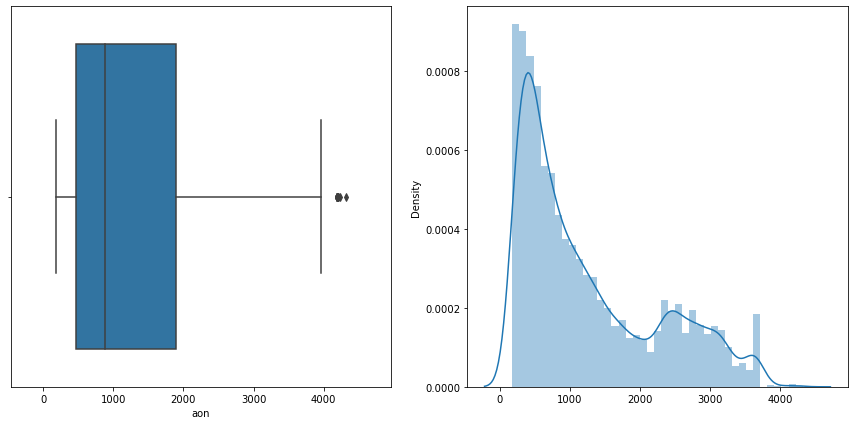

<Figure size 576x360 with 0 Axes>

In [99]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,7))
plt.figure(figsize=(8, 5))
sns.boxplot(ax=axes[0], x='aon' ,data=df)
sns.distplot(ax=axes[1], x=df.aon)
plt.show()

#### Bivariate Analysis

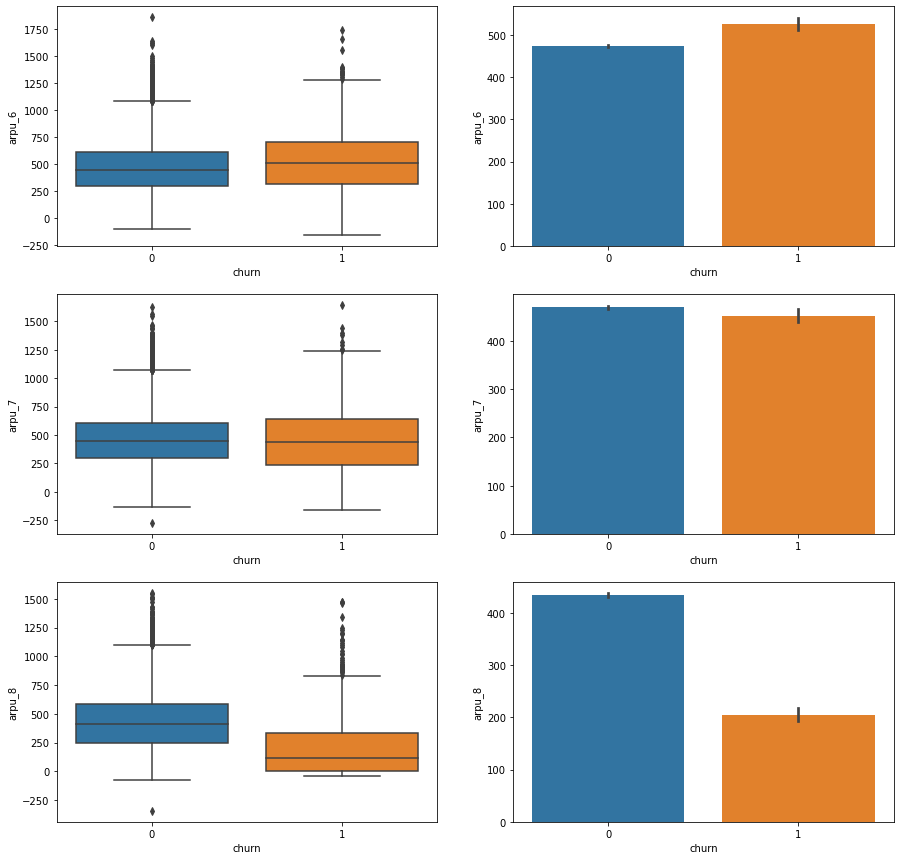

In [100]:
# Average Revenue per user based on churn
fig, axes = plt.subplots(3, 2, sharex=False, figsize=(15,15))
sns.boxplot(ax=axes[0,0], data=df, x='churn', y = 'arpu_6')
sns.barplot(ax=axes[0,1], data=df, x='churn', y = 'arpu_6')
sns.boxplot(ax=axes[1,0], data=df, x='churn', y = 'arpu_7')
sns.barplot(ax=axes[1,1], data=df, x='churn', y = 'arpu_7')
sns.boxplot(ax=axes[2,0], data=df, x='churn', y = 'arpu_8')
sns.barplot(ax=axes[2,1], data=df, x='churn', y = 'arpu_8')
plt.show()

<b>Here we can see the average revenue per user for the people who have churned is same if not greater than the rest of the population in first two month and in the 8th month these people churned out due to some reason.</b>

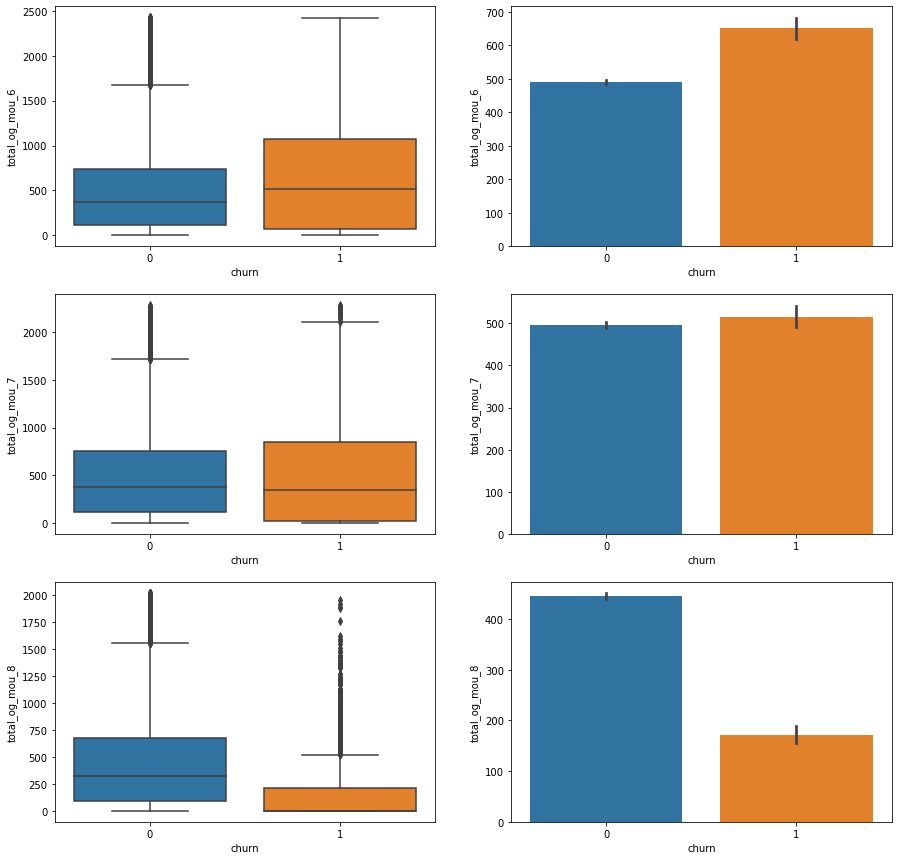

In [101]:
# Total Outgoing Calls per user based on churn
fig, axes = plt.subplots(3, 2, sharex=False, figsize=(15,15))
sns.boxplot(ax=axes[0,0], data=df, x='churn', y = 'total_og_mou_6')
sns.barplot(ax=axes[0,1], data=df, x='churn', y = 'total_og_mou_6')
sns.boxplot(ax=axes[1,0], data=df, x='churn', y = 'total_og_mou_7')
sns.barplot(ax=axes[1,1], data=df, x='churn', y = 'total_og_mou_7')
sns.boxplot(ax=axes[2,0], data=df, x='churn', y = 'total_og_mou_8')
sns.barplot(ax=axes[2,1], data=df, x='churn', y = 'total_og_mou_8')
plt.show()

<b>Here we can see the total outgoing for the people who have churned is same if not greater than the rest of the population in first two month and in the 8th month these people churned out due to some reason.</b>

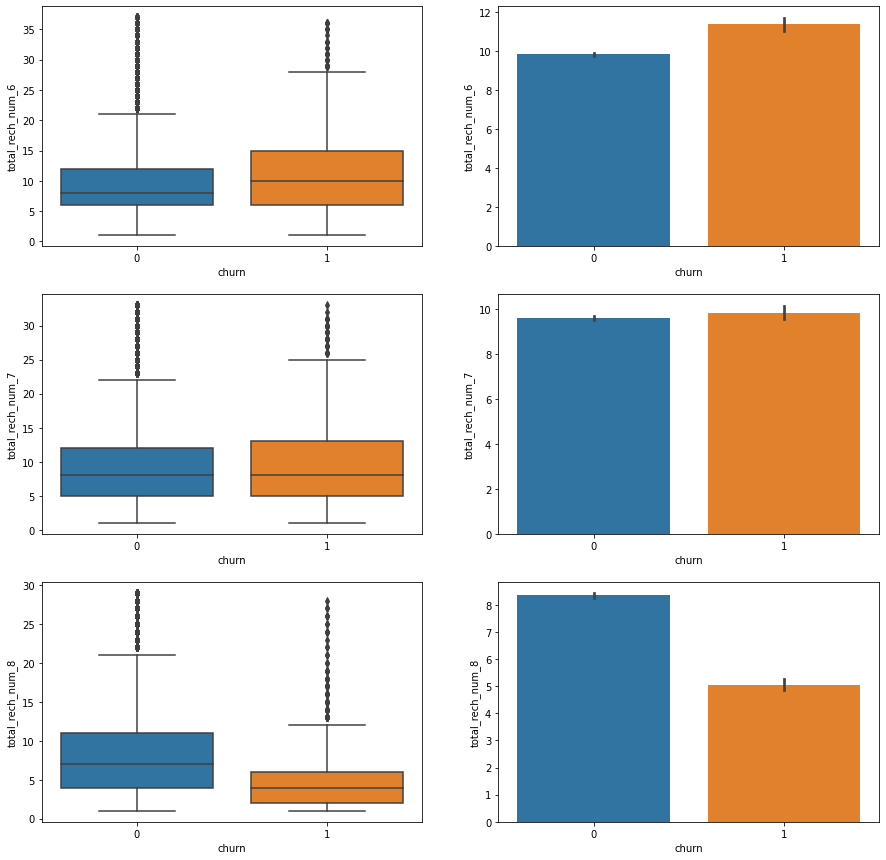

In [102]:
# Total Number of Recharge per user based on churn
fig, axes = plt.subplots(3, 2, sharex=False, figsize=(15,15))
sns.boxplot(ax=axes[0,0], data=df, x='churn', y = 'total_rech_num_6')
sns.barplot(ax=axes[0,1], data=df, x='churn', y = 'total_rech_num_6')
sns.boxplot(ax=axes[1,0], data=df, x='churn', y = 'total_rech_num_7')
sns.barplot(ax=axes[1,1], data=df, x='churn', y = 'total_rech_num_7')
sns.boxplot(ax=axes[2,0], data=df, x='churn', y = 'total_rech_num_8')
sns.barplot(ax=axes[2,1], data=df, x='churn', y = 'total_rech_num_8')
plt.show()

<b>Here we can see the Total Number of Recharge for the people who have churned is same if not greater than the rest of the population in first two month and in the 8th month these people churned out due to some reason.</b>

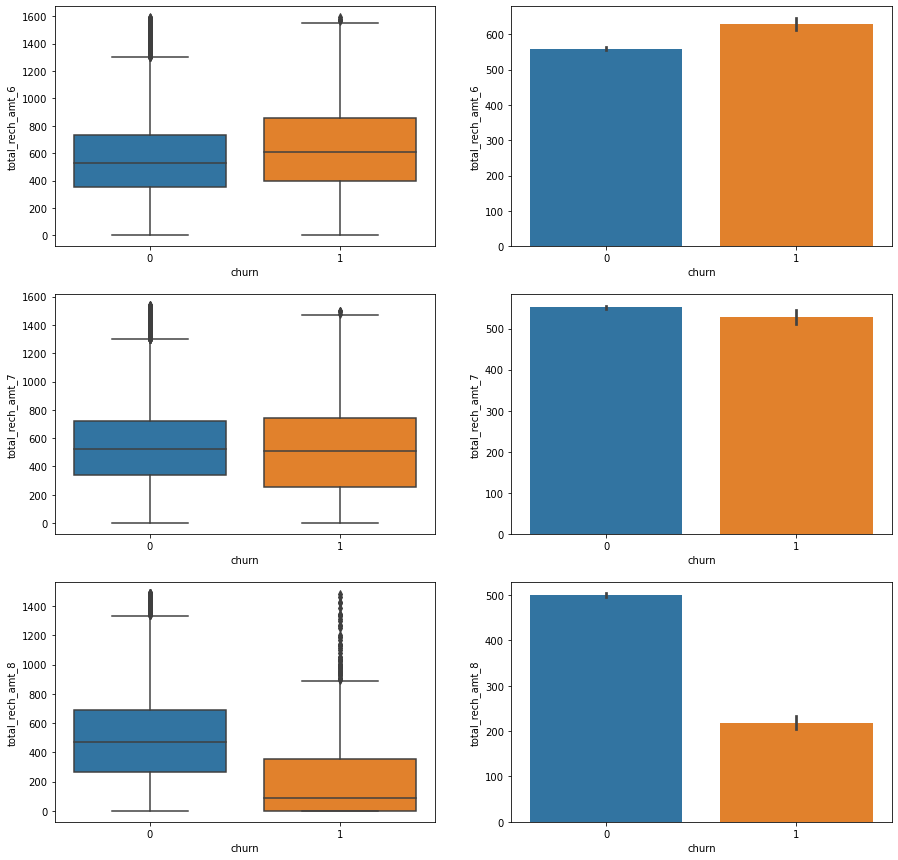

In [103]:
# Total Recharge Amount per user based on churn
fig, axes = plt.subplots(3, 2, sharex=False, figsize=(15,15))
sns.boxplot(ax=axes[0,0], data=df, x='churn', y = 'total_rech_amt_6')
sns.barplot(ax=axes[0,1], data=df, x='churn', y = 'total_rech_amt_6')
sns.boxplot(ax=axes[1,0], data=df, x='churn', y = 'total_rech_amt_7')
sns.barplot(ax=axes[1,1], data=df, x='churn', y = 'total_rech_amt_7')
sns.boxplot(ax=axes[2,0], data=df, x='churn', y = 'total_rech_amt_8')
sns.barplot(ax=axes[2,1], data=df, x='churn', y = 'total_rech_amt_8')
plt.show()

<b>Here we can see the Total Recharge Amount for the people who have churned is same if not greater than the rest of the population in first two month and in the 8th month these people churned out due to some reason.</b>

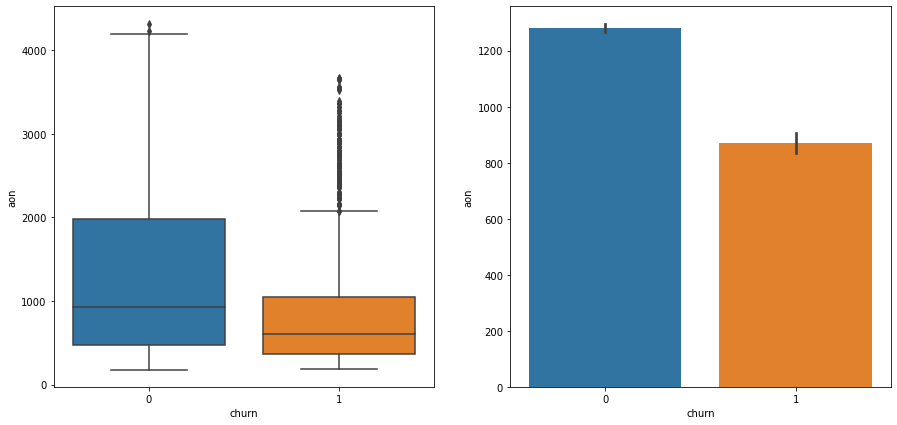

In [104]:
fig, axes = plt.subplots(1, 2, sharex=False, figsize=(15,7))
sns.boxplot(ax=axes[0], data=df, x='churn', y = 'aon')
sns.barplot(ax=axes[1], data=df, x='churn', y = 'aon')
plt.show()

In [105]:
num_vars_new = df.select_dtypes(include=['int32', 'int64', 'float64'])

In [106]:
num_vars_new.head()

mobile_number   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  \
0     7000842753  197.385  214.816  213.803        89.21        88.36   
2     7001524846  378.721  492.223  137.362       413.69       351.03   
3     7002124215  514.453  597.753  637.760       102.41       132.11   
4     7000887461   74.350  193.897  366.966        48.96        50.66   
6     7000815202  363.987  486.558  393.909       248.99       619.96   

   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0         0.00        229.44        228.73          0.00            0.0   
2        35.08         94.66         80.63        136.48            0.0   
3        85.14        757.93        896.68        983.39            0.0   
4        33.58         85.41         89.36        205.89            0.0   
6       666.38         88.86         50.58         97.81            0.0   

   roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.0            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0            0.0   
3            0.0            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0            0.0   
6            0.0            0.0            0.0            0.0            0.0   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0             25.63             26.06              0.00             80.21   
2            297.13            217.59             12.49             80.96   
3              4.48              6.16             23.34             91.81   
4             48.96             50.66             33.58             82.94   
6             29.88             17.33              9.48             33.76   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             82.11              0.00              0.11              0.21   
2             70.58             50.54              0.00              0.00   
3             87.93            104.81              0.75              0.00   
4             83.01            148.56              0.00              0.00   
6             16.19             18.96              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               0.0               0.0              0.00   
2              0.00               0.0               0.0              7.15   
3              1.58               0.0               0.0              0.00   
4              0.00               0.0               0.0             17.71   
6              0.00               0.0               0.0              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0        129.24        133.59          0.00              3.51   
2        378.09        288.18         63.04            116.56   
3         97.04         94.09        129.74             97.93   
4        131.91        133.68        182.14              0.00   
6         63.64         33.53         28.44            219.11   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0              3.48              0.00             18.41             18.14   
2            133.43             22.58             13.69             10.04   
3            125.94             61.79            665.36            808.74   
4              0.00              0.00              2.36              6.35   
6            602.63            656.89             55.09             34.38   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0              0.00               0.0               0.0               0.0   
2             75.69               0.0               0.0               0.0   
3            876.99               0.0               0.0               0.0   
4             39.61               0.0               0.0               0.0   
6   

In [107]:
num_vars_new.shape

(22261, 139)

In [108]:
num_vars_new.drop(['night_pck_user_6', 'night_pck_user_7', 
                   'night_pck_user_8','mobile_number', 'churn'], axis=1, inplace=True)

In [109]:
num_vars_new.shape

(22261, 134)

In [110]:
df.drop(['date_of_last_rech_6', 'date_of_last_rech_7','date_of_last_rech_8'],axis = 1, inplace = True)

In [111]:
df.shape

(22261, 139)

## Modeling

### Splitting the Data into Training and Testing Sets

In [112]:
# Splitting the data set into train and test set
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100, stratify=df['churn'])

In [113]:
# Initialising the scaler variable
scaler = StandardScaler()

In [114]:
# Fiting and transforming the train set
df_train[list(num_vars_new)] = scaler.fit_transform(df_train[list(num_vars_new)])
df_train.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
16907     7000746661 -1.180273 -1.028731 -1.055615    -0.570344    -0.609217   
20792     7001049018  1.859503  0.554749 -0.082692    -0.300293    -0.477062   
17036     7001169342  0.264344  0.369668 -1.596236     0.927130     0.834448   
28393     7000033346  3.489225  3.224661 -1.297037     0.524985     0.753340   
13096     7002213493 -0.965100 -0.823086  0.096220    -0.586764    -0.612803   

       onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
16907    -0.587936     -0.645769     -0.669316     -0.748112      -0.096912   
20792    -0.504421      3.196822      2.414981      1.608594      -0.212516   
17036    -0.605217     -0.846984     -0.754740     -0.914922      -0.212516   
28393    -0.617632      1.758852      0.786944     -0.909682      -0.212516   
13096    -0.540395     -0.572314     -0.619604     -0.288858      -0.212516   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
16907      -0.177181      -0.180628      -0.184723      -0.231275   
20792      -0.177181      -0.180628      -0.257162      -0.231275   
17036      -0.122479       0.033111      -0.257162      -0.081023   
28393      -0.177181      -0.180628      -0.257162      -0.231275   
13096      -0.177181      -0.180628      -0.257162      -0.231275   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
16907      -0.232894         -0.288589         -0.366243         -0.399931   
20792      -0.232894          0.318945         -0.073893         -0.213249   
17036      -0.106450         -0.354610         -0.467993         -0.496188   
28393      -0.232894          1.108476          0.775634         -0.466310   
13096      -0.232894         -0.348035         -0.399148         -0.325274   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
16907         -0.302362         -0.299764         -0.483938         -0.297787   
20792          6.406870          4.969403          3.416097         -0.277067   
17036         -0.605179         -0.639232         -0.760366         -0.345740   
28393          2.225495          1.446829         -0.751926         -0.330348   
13096         -0.199669         -0.271348          0.080733         -0.345740   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
16907         -0.324555         -0.309042         -0.255696         -0.256297   
20792         -0.196883         -0.347736         -0.021769          0.608545   
17036         -0.354954         -0.347736         -0.255696         -0.256297   
28393         -0.354954         -0.347736          3.923333         -0.039694   
13096         -0.340971          0.521588         -0.255696         -0.256297   

       loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
16907         -0.251109     -0.386296     -0.430301     -0.566259   
20792         -0.251109      4.649312      3.402959      2.284024   
17036         -0.251109     -0.637080     -0.723852     -0.812747   
28393         -0.251109      2.132848      1.406239     -0.791695   
13096          1.030482     -0.348912     -0.429473     -0.077901   

       std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
16907         -0.454656         -0.459622         -0.421626         -0.476373   
20792         -0.454656         -0.459622         -0.421626         -0.492118   
17036          1.222621          1.161679         -0.421626         -0.492118   
28393          0.054574          0.465643         -0.421626          0.453984   
13096         -0.435827         -0.447315         -0.406056         -0.467767   

       std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
16907         -0.498072         -0.466946         -0.162882         -0.143683   
20792         -0.499090         -0.466946         -0.162882         -0.143683   
17036         -0.398733         -0.466946       

In [115]:
df_train.shape

(15582, 139)

In [116]:
# Transforming our scaler to the test set
df_test[list(num_vars_new)] = scaler.transform(df_test[list(num_vars_new)])
df_test.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
13093     7002180392 -0.199710 -0.172442 -0.793248    -0.390104    -0.387098   
20409     7001868609  1.848565  1.865925  2.938488    -0.446738    -0.313287   
23323     7001999049  0.635092 -0.128640 -0.051329     1.735649     1.145315   
20189     7000030788 -1.523450 -0.749795 -0.917265    -0.630311    -0.662634   
749       7001428247  0.154867 -1.243708 -0.754417    -0.455843    -0.487446   

       onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
13093    -0.369627     -0.251135     -0.239441     -0.237577      -0.212516   
20409    -0.090374      1.991044      2.127830      3.179607      -0.212516   
23323     1.674051     -0.577087     -0.640759     -0.678762      -0.212516   
20189    -0.630998     -0.788855     -0.880552     -0.823997      -0.212516   
749      -0.414170     -0.442272     -0.497354     -0.483708       1.105335   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
13093      -0.177181      -0.180628      -0.257162      -0.231275   
20409      -0.089922      -0.180628      -0.257162       0.494222   
23323      -0.177181      -0.180628      -0.257162      -0.231275   
20189      -0.177181      -0.180628      -0.257162      -0.231275   
749        -0.177181      -0.180628       0.944286      -0.231275   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
13093      -0.232894         -0.309263         -0.304641         -0.310689   
20409      -0.232894         -0.300587         -0.383972         -0.032400   
23323      -0.232894         -0.261612         -0.439365         -0.451568   
20189      -0.232894         -0.479736         -0.484411         -0.496188   
749        -0.232894         -0.255850         -0.158742         -0.022704   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
13093         -0.337970         -0.337921         -0.336468         -0.339228   
20409          3.103188          3.481471          4.469876         -0.345740   
23323         -0.215821         -0.443626         -0.552974          0.467676   
20189         -0.549704         -0.693897         -0.625274         -0.176426   
749           -0.347775         -0.030495         -0.086823         -0.278251   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
13093         -0.342186         -0.347091         -0.255696         -0.256297   
20409         -0.337931         -0.195540         -0.255696         -0.256297   
23323          0.587999          0.224935         -0.255696         -0.256297   
20189         -0.294157         -0.258095          0.326484          0.434321   
749            0.006177          0.124975         -0.255696         -0.256297   

       loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
13093         -0.251109     -0.340544     -0.329388     -0.327134   
20409         -0.251109      1.994940      2.189820      3.130016   
23323         -0.251109     -0.264291     -0.513742     -0.608163   
20189         -0.251109     -0.654649     -0.767117     -0.711629   
749           -0.251109     -0.399446     -0.109149     -0.068151   

       std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
13093         -0.442812         -0.447758         -0.415763         -0.427706   
20409         -0.306385         -0.145166         -0.054852          0.343353   
23323          2.060315          1.494612          2.094110         -0.485645   
20189         -0.417875         -0.459622         -0.421626         -0.492118   
749           -0.420541         -0.429077         -0.416151         -0.472525   

       std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
13093         -0.433107         -0.413758         -0.162882         -0.143683   
20409          0.082030          0.682174         -0.162882         -0.143683   
23323         -0.425832         -0.364036       

In [117]:
df_test.shape

(6679, 139)

In [118]:
# Creating X_train and y_train
y_train = df_train.pop('churn')
X_train = df_train.drop(['mobile_number'], axis=1)
y_train.value_counts()

0    14494
1     1088
Name: churn, dtype: int64

In [119]:
X_train.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
16907 -1.180273 -1.028731 -1.055615    -0.570344    -0.609217    -0.587936   
20792  1.859503  0.554749 -0.082692    -0.300293    -0.477062    -0.504421   
17036  0.264344  0.369668 -1.596236     0.927130     0.834448    -0.605217   
28393  3.489225  3.224661 -1.297037     0.524985     0.753340    -0.617632   
13096 -0.965100 -0.823086  0.096220    -0.586764    -0.612803    -0.540395   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
16907     -0.645769     -0.669316     -0.748112      -0.096912      -0.177181   
20792      3.196822      2.414981      1.608594      -0.212516      -0.177181   
17036     -0.846984     -0.754740     -0.914922      -0.212516      -0.122479   
28393      1.758852      0.786944     -0.909682      -0.212516      -0.177181   
13096     -0.572314     -0.619604     -0.288858      -0.212516      -0.177181   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
16907      -0.180628      -0.184723      -0.231275      -0.232894   
20792      -0.180628      -0.257162      -0.231275      -0.232894   
17036       0.033111      -0.257162      -0.081023      -0.106450   
28393      -0.180628      -0.257162      -0.231275      -0.232894   
13096      -0.180628      -0.257162      -0.231275      -0.232894   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
16907         -0.288589         -0.366243         -0.399931         -0.302362   
20792          0.318945         -0.073893         -0.213249          6.406870   
17036         -0.354610         -0.467993         -0.496188         -0.605179   
28393          1.108476          0.775634         -0.466310          2.225495   
13096         -0.348035         -0.399148         -0.325274         -0.199669   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
16907         -0.299764         -0.483938         -0.297787         -0.324555   
20792          4.969403          3.416097         -0.277067         -0.196883   
17036         -0.639232         -0.760366         -0.345740         -0.354954   
28393          1.446829         -0.751926         -0.330348         -0.354954   
13096         -0.271348          0.080733         -0.345740         -0.340971   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
16907         -0.309042         -0.255696         -0.256297         -0.251109   
20792         -0.347736         -0.021769          0.608545         -0.251109   
17036         -0.347736         -0.255696         -0.256297         -0.251109   
28393         -0.347736          3.923333         -0.039694         -0.251109   
13096          0.521588         -0.255696         -0.256297          1.030482   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
16907     -0.386296     -0.430301     -0.566259         -0.454656   
20792      4.649312      3.402959      2.284024         -0.454656   
17036     -0.637080     -0.723852     -0.812747          1.222621   
28393      2.132848      1.406239     -0.791695          0.054574   
13096     -0.348912     -0.429473     -0.077901         -0.435827   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
16907         -0.459622         -0.421626         -0.476373         -0.498072   
20792         -0.459622         -0.421626         -0.492118         -0.499090   
17036          1.161679         -0.421626         -0.492118         -0.398733   
28393          0.465643         -0.421626          0.453984         -0.021892   
13096         -0.447315         -0.406056         -0.467767         -0.468135   

       std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
16907         -0.466946         -0.162882         -0.143683         -0.148147   
20792         -0.466946         -0.162882         -0.143683         -0.148147   
17036         -0.466946         

In [120]:
print('X_train shape :', X_train.shape)
print('y_train shape :', y_train.shape)
print('Before SMOTE :')
print(y_train.value_counts())

X_train shape : (15582, 137)
y_train shape : (15582,)
Before SMOTE :
0    14494
1     1088
Name: churn, dtype: int64


In [121]:
# Creating X_test and y_test
y_test = df_test.pop('churn')
X_test = df_test.drop(['mobile_number'], axis=1)

In [122]:
print('X_test shape :', X_test.shape)
print('y_test shape :', y_test.shape)

X_test shape : (6679, 137)
y_test shape : (6679,)


Installing imbalanced-learn for handling imbalance in our data

In [123]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [124]:
from imblearn.over_sampling import SMOTE 
from imblearn.metrics import sensitivity_specificity_support

In [125]:
# Balancing the actual variable using oversampling
smote = SMOTE(random_state=100)
X_train,y_train = smote.fit_sample(X_train,y_train.ravel())

In [126]:
X_train.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0 -1.180273 -1.028731 -1.055615    -0.570344    -0.609217    -0.587936   
1  1.859503  0.554749 -0.082692    -0.300293    -0.477062    -0.504421   
2  0.264344  0.369668 -1.596236     0.927130     0.834448    -0.605217   
3  3.489225  3.224661 -1.297037     0.524985     0.753340    -0.617632   
4 -0.965100 -0.823086  0.096220    -0.586764    -0.612803    -0.540395   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0     -0.645769     -0.669316     -0.748112      -0.096912      -0.177181   
1      3.196822      2.414981      1.608594      -0.212516      -0.177181   
2     -0.846984     -0.754740     -0.914922      -0.212516      -0.122479   
3      1.758852      0.786944     -0.909682      -0.212516      -0.177181   
4     -0.572314     -0.619604     -0.288858      -0.212516      -0.177181   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0      -0.180628      -0.184723      -0.231275      -0.232894   
1      -0.180628      -0.257162      -0.231275      -0.232894   
2       0.033111      -0.257162      -0.081023      -0.106450   
3      -0.180628      -0.257162      -0.231275      -0.232894   
4      -0.180628      -0.257162      -0.231275      -0.232894   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0         -0.288589         -0.366243         -0.399931         -0.302362   
1          0.318945         -0.073893         -0.213249          6.406870   
2         -0.354610         -0.467993         -0.496188         -0.605179   
3          1.108476          0.775634         -0.466310          2.225495   
4         -0.348035         -0.399148         -0.325274         -0.199669   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0         -0.299764         -0.483938         -0.297787         -0.324555   
1          4.969403          3.416097         -0.277067         -0.196883   
2         -0.639232         -0.760366         -0.345740         -0.354954   
3          1.446829         -0.751926         -0.330348         -0.354954   
4         -0.271348          0.080733         -0.345740         -0.340971   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0         -0.309042         -0.255696         -0.256297         -0.251109   
1         -0.347736         -0.021769          0.608545         -0.251109   
2         -0.347736         -0.255696         -0.256297         -0.251109   
3         -0.347736          3.923333         -0.039694         -0.251109   
4          0.521588         -0.255696         -0.256297          1.030482   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0     -0.386296     -0.430301     -0.566259         -0.454656   
1      4.649312      3.402959      2.284024         -0.454656   
2     -0.637080     -0.723852     -0.812747          1.222621   
3      2.132848      1.406239     -0.791695          0.054574   
4     -0.348912     -0.429473     -0.077901         -0.435827   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0         -0.459622         -0.421626         -0.476373         -0.498072   
1         -0.459622         -0.421626         -0.492118         -0.499090   
2          1.161679         -0.421626         -0.492118         -0.398733   
3          0.465643         -0.421626          0.453984         -0.021892   
4         -0.447315         -0.406056         -0.467767         -0.468135   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0         -0.466946         -0.162882         -0.143683         -0.148147   
1         -0.466946         -0.162882         -0.143683         -0.148147   
2         -0.466946         -0.162882         -0.143683         -0.148147   
3         -0.463777         -0.162882         -0.143683         -0.148147   
4         -0.445020         -0.083171         -0.143683         -0.148147   



In [127]:
print('X_train shape :', X_train.shape)
print('y_train shape :', y_train.shape)
print('After SMOTE :')
(unique, counts) = np.unique(y_train, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

X_train shape : (28988, 137)
y_train shape : (28988,)
After SMOTE :
[[    0 14494]
 [    1 14494]]


### Bulding PCA

In [128]:
# Let's start building a PCA model
pca = PCA(random_state=100)

In [129]:
# Fitting the model
pca.fit(X_train)

PCA(random_state=100)

In [130]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

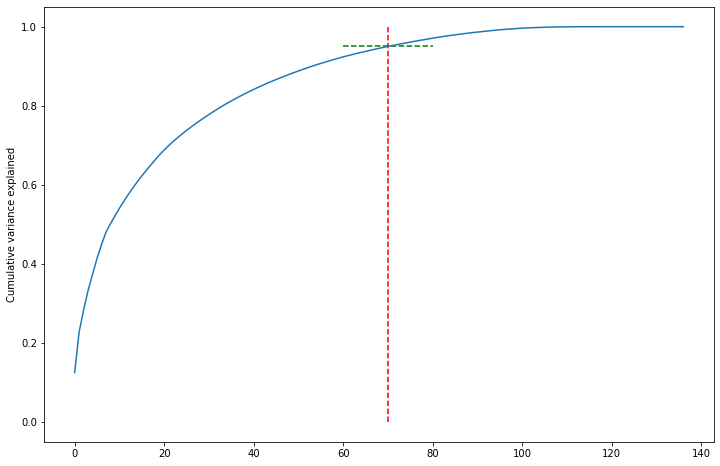

In [131]:
# Checking Cummulative explained variance
fig = plt.figure(figsize=[12,8])
plt.vlines(x=70, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=80, xmin=60, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

Performing PCA with 71 components can tell us about 95% variation in the dataset

In [132]:
# PCA model 1
pca1 = IncrementalPCA(n_components=71)

In [133]:
# Fitting the model on the Train set
X_train_pca = pca1.fit_transform(X_train)
X_train_pca.shape

(28988, 71)

In [134]:
# Fitting the model on the Train set
X_test_pca = pca1.transform(X_test)
X_test_pca.shape

(6679, 71)

#### Applying logistic regression on our Principal components

In [135]:
# Logistic Regression on PCA model 1
pca_log = LogisticRegression(class_weight = 'balanced')

In [136]:
model_pca_log1 = pca_log.fit(X_train_pca, y_train)

In [137]:
# Making predictions on the train set
pred_pca_log_train = model_pca_log1.predict_proba(X_train_pca)[:,1]
pred_pca_log_train_new = model_pca_log1.predict(X_train_pca)

In [138]:
# Calculating Scores on the train set
print('-'*50)
print('Train Accuracy:', round(accuracy_score(y_train, pred_pca_log_train_new),2))
print('Train ROC_AUC :', round(roc_auc_score(y_train, pred_pca_log_train),2))
sensitivity, specificity, _ = sensitivity_specificity_support(y_train, pred_pca_log_train_new, average='binary')
print('Sensitivity   :\t', round(sensitivity, 2), '\n', 'Specificity   :\t', round(specificity, 2), sep='')
print(sklearn.metrics.classification_report(y_train, pred_pca_log_train_new))
print('Train Confusion Matrix:')
print(confusion_matrix(y_train, pred_pca_log_train_new))
print('-'*50)

--------------------------------------------------
Train Accuracy: 0.84
Train ROC_AUC : 0.91
Sensitivity   :	0.85
Specificity   :	0.82
              precision    recall  f1-score   support

           0       0.84      0.82      0.83     14494
           1       0.83      0.85      0.84     14494

    accuracy                           0.84     28988
   macro avg       0.84      0.84      0.84     28988
weighted avg       0.84      0.84      0.84     28988

Train Confusion Matrix:
[[11900  2594]
 [ 2184 12310]]
--------------------------------------------------


In [139]:
# Making predictions on the test set
pred_pca_log_test = model_pca_log1.predict_proba(X_test_pca)[:,1]
pred_pca_log_test_new = model_pca_log1.predict(X_test_pca)

In [140]:
# Calculating Scores on the test set
print('-'*50)
print('Test Accuracy :', round(accuracy_score(y_test, pred_pca_log_test_new),2))
print('Test ROC_AUC  :', round(roc_auc_score(y_test, pred_pca_log_test),2))
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, pred_pca_log_test_new, average='binary')
print('Sensitivity   :\t', round(sensitivity, 2), '\n', 'Specificity   :\t', round(specificity, 2), sep='')
print(sklearn.metrics.classification_report(y_test, pred_pca_log_test_new))
print('Test Confusion Matrix:')
print(confusion_matrix(y_test, pred_pca_log_test_new))
print('-'*50)

--------------------------------------------------
Test Accuracy : 0.82
Test ROC_AUC  : 0.87
Sensitivity   :	0.79
Specificity   :	0.82
              precision    recall  f1-score   support

           0       0.98      0.82      0.89      6213
           1       0.24      0.79      0.37       466

    accuracy                           0.82      6679
   macro avg       0.61      0.80      0.63      6679
weighted avg       0.93      0.82      0.86      6679

Test Confusion Matrix:
[[5082 1131]
 [ 100  366]]
--------------------------------------------------


In [141]:
# Lets Automate PCA and see how many components are require to get 90% explainability
# PCA model 2
pca2 = PCA(0.90)

In [142]:
# Fitting the model on train set
X_train_pca2 = pca2.fit_transform(X_train)
X_train_pca2.shape

(28988, 55)

In [143]:
# Fitting the model on test set
X_test_pca2 = pca2.transform(X_test)
X_test_pca2.shape

(6679, 55)

<b>Here we can see only 55 components are required to explain 90% variation in the dataset. So let's build another logistic regression model on those principal components</b> 

In [144]:
# Logistic Regression Model based on PCA model 2
pca_log2 = LogisticRegression(class_weight = 'balanced')

In [145]:
model_pca_log2 = pca_log2.fit(X_train_pca2, y_train)

In [146]:
# Making predictions on the train set

In [147]:
pred_pca_log_train2 = model_pca_log2.predict_proba(X_train_pca2)[:,1]
pred_pca_log_train2_new = model_pca_log2.predict(X_train_pca2)

In [148]:
# Calculating Scores on the train set
print('-'*50)
print('Train Accuracy:', round(accuracy_score(y_train, pred_pca_log_train2_new),2))
print('Train ROC_AUC :', round(roc_auc_score(y_train, pred_pca_log_train2),2))
sensitivity, specificity, _ = sensitivity_specificity_support(y_train, pred_pca_log_train2_new, average='binary')
print('Sensitivity   :\t', round(sensitivity, 2), '\n', 'Specificity   :\t', round(specificity, 2), sep='')
print(sklearn.metrics.classification_report(y_train, pred_pca_log_train2_new))
print('Train Confusion Matrix:')
print(confusion_matrix(y_train, pred_pca_log_train2_new))
print('-'*50)

--------------------------------------------------
Train Accuracy: 0.83
Train ROC_AUC : 0.9
Sensitivity   :	0.85
Specificity   :	0.82
              precision    recall  f1-score   support

           0       0.84      0.82      0.83     14494
           1       0.82      0.85      0.84     14494

    accuracy                           0.83     28988
   macro avg       0.83      0.83      0.83     28988
weighted avg       0.83      0.83      0.83     28988

Train Confusion Matrix:
[[11877  2617]
 [ 2179 12315]]
--------------------------------------------------


In [149]:
# Making predictions on the test set
pred_pca_log_test2 = model_pca_log2.predict_proba(X_test_pca2)[:,1]
pred_pca_log_test2_new = model_pca_log2.predict(X_test_pca2)

In [150]:
# Calculating Scores on the test set
print('-'*50)
print('Test Accuracy :', round(accuracy_score(y_test, pred_pca_log_test2_new),2))
print('Test ROC_AUC  :', round(roc_auc_score(y_test, pred_pca_log_test2),2))
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, pred_pca_log_test2_new, average='binary')
print('Sensitivity   :\t', round(sensitivity, 2), '\n', 'Specificity   :\t', round(specificity, 2), sep='')
print(sklearn.metrics.classification_report(y_test, pred_pca_log_test2_new))
print('Test Confusion Matrix:')
print(confusion_matrix(y_test, pred_pca_log_test2_new))
print('-'*50)

--------------------------------------------------
Test Accuracy : 0.82
Test ROC_AUC  : 0.87
Sensitivity   :	0.79
Specificity   :	0.82
              precision    recall  f1-score   support

           0       0.98      0.82      0.89      6213
           1       0.24      0.79      0.37       466

    accuracy                           0.82      6679
   macro avg       0.61      0.80      0.63      6679
weighted avg       0.93      0.82      0.86      6679

Test Confusion Matrix:
[[5081 1132]
 [  99  367]]
--------------------------------------------------


<b>Here we can see we are getting simmilar result with 55 principal components so we will go ahead and build a Random Forest Model on that.</b>

#### Applying Random Forest model on our Principal components

In [151]:
def evaluate_model(dt_classifier):
    print('-'*50)
    print('Train Accuracy:', round(accuracy_score(y_train, dt_classifier.predict(X_train_pca2)),2))
    print('Train ROC_AUC :', round(roc_auc_score(y_train, dt_classifier.predict(X_train_pca2)),2))
    sensitivity, specificity, _ = sensitivity_specificity_support(y_train, dt_classifier.predict(X_train_pca2), average='binary')
    print('Sensitivity   :\t', round(sensitivity, 2), '\n', 'Specificity   :\t', round(specificity, 2), sep='')
    print(sklearn.metrics.classification_report(y_train, dt_classifier.predict(X_train_pca2)))
    print('Train Confusion Matrix:')
    print(confusion_matrix(y_train, dt_classifier.predict(X_train_pca2)))
    print('-'*50)
    print('Test Accuracy :', round(accuracy_score(y_test, dt_classifier.predict(X_test_pca2)),2))
    print('Test ROC_AUC  :', round(roc_auc_score(y_test, dt_classifier.predict(X_test_pca2)),2))
    sensitivity, specificity, _ = sensitivity_specificity_support(y_test, dt_classifier.predict(X_test_pca2), average='binary')
    print('Sensitivity   :\t', round(sensitivity, 2), '\n', 'Specificity   :\t', round(specificity, 2), sep='')
    print(sklearn.metrics.classification_report(y_test, dt_classifier.predict(X_test_pca2)))
    print('Test Confusion Matrix:')
    print(confusion_matrix(y_test, dt_classifier.predict(X_test_pca2)))
    print('-'*50)

In [152]:
# Random Forest based on PCA model 2
classifier_rf = RandomForestClassifier(class_weight = 'balanced', random_state=100, n_jobs=-1)

In [153]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [35, 40, 45],
    'min_samples_leaf': [2, 3, 4, 5],
    'max_features': [3, 4, 5, 6],
    'n_estimators': [60, 80, 100]
}

# Creating StratifiedKFolds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

In [154]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=folds, n_jobs=-1, verbose=1, scoring = 'roc_auc')

In [155]:
grid_search.fit(X_train_pca2, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [35, 40, 45],
                         'max_features': [3, 4, 5, 6],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'n_estimators': [60, 80, 100]},
             scoring='roc_auc', verbose=1)

In [156]:
rf_best = grid_search.best_estimator_

In [157]:
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=40, max_features=3,
                       min_samples_leaf=2, n_jobs=-1, random_state=100)

In [158]:
# Calculating Scores on the train and test set
evaluate_model(rf_best)

--------------------------------------------------
Train Accuracy: 1.0
Train ROC_AUC : 1.0
Sensitivity   :	1.0
Specificity   :	1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14494
           1       1.00      1.00      1.00     14494

    accuracy                           1.00     28988
   macro avg       1.00      1.00      1.00     28988
weighted avg       1.00      1.00      1.00     28988

Train Confusion Matrix:
[[14476    18]
 [    0 14494]]
--------------------------------------------------
Test Accuracy : 0.92
Test ROC_AUC  : 0.7
Sensitivity   :	0.45
Specificity   :	0.96
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      6213
           1       0.43      0.45      0.44       466

    accuracy                           0.92      6679
   macro avg       0.69      0.70      0.70      6679
weighted avg       0.92      0.92      0.92      6679

Test Confusion Matrix:
[[5

<b></br>
 1) PCA Model 1 (71 PC) + Logistic Regresion :-      
Test Accuracy : 0.82          
Test ROC_AUC  : 0.87           
Sensitivity   :	0.79        
Specificity   :	0.82          
</br>           
2) PCA Model 2 (55 PC) + Logistic Regresion :-                     
Test Accuracy : 0.82          
Test ROC_AUC  : 0.87           
Sensitivity   :	0.79             
Specificity   :	0.82           
</br>                              
3) PCA Model 2 + Random Forest :-                   
Test Accuracy : 0.92    
Test ROC_AUC  : 0.7      
Sensitivity   :	0.45       
Specificity   :	0.96                   
 
By loking at the metrics we can say that our PCA Model 2 with 52 Prinicipal Components with Logitic Regression does the best on all around metrics.
</b>
       

### Logistic Regression with Feature Selection

#### Using Random Forest for feature importance with Logistic Regression

In [159]:
# Building Random Forest for Feature Importance
from sklearn.ensemble import RandomForestClassifier as RClf

model_2 = RClf(class_weight = 'balanced', n_estimators = 100, random_state=100,n_jobs=-1)
model_2.fit(X_train, y_train)
importances = model_2.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_2.estimators_], axis = 0)

indices = np.argsort(importances)[::-1]

print('Feature Ranking:')

for f in range(X_train.shape[1]):
    print('%d. features %d (%f)'% (f+1, indices[f], importances[indices[f]]))

Feature Ranking:
1. features 80 (0.062137)
2. features 14 (0.049920)
3. features 114 (0.046180)
4. features 11 (0.040663)
5. features 2 (0.035704)
6. features 95 (0.035412)
7. features 53 (0.033769)
8. features 98 (0.031940)
9. features 129 (0.031121)
10. features 29 (0.022229)
11. features 101 (0.021702)
12. features 92 (0.021165)
13. features 65 (0.019573)
14. features 62 (0.018301)
15. features 59 (0.016027)
16. features 56 (0.015195)
17. features 20 (0.014209)
18. features 13 (0.013226)
19. features 8 (0.009850)
20. features 108 (0.009785)
21. features 32 (0.009020)
22. features 23 (0.008960)
23. features 111 (0.008947)
24. features 77 (0.008615)
25. features 5 (0.008225)
26. features 35 (0.008092)
27. features 71 (0.007995)
28. features 17 (0.007932)
29. features 46 (0.007839)
30. features 41 (0.007600)
31. features 100 (0.007528)
32. features 67 (0.007429)
33. features 31 (0.007174)
34. features 79 (0.007074)
35. features 10 (0.006991)
36. features 66 (0.006700)
37. features 33 (

In [160]:
# Creating a dataframe of important features
imp_df = pd.DataFrame({
    'Varname': X_train.columns,
    'Imp': importances
})

In [161]:
# top 20 features
imp_df.sort_values(by="Imp", ascending=False).head(20)

Varname       Imp
80       total_ic_mou_8  0.062137
14        roam_og_mou_8  0.049920
114    night_pck_user_8  0.046180
11        roam_ic_mou_8  0.040663
2                arpu_8  0.035704
95     total_rech_amt_8  0.035412
53       total_og_mou_8  0.033769
98       max_rech_amt_8  0.031940
129           fb_user_8  0.031121
29         loc_og_mou_8  0.022229
101  last_day_rch_amt_8  0.021702
92     total_rech_num_8  0.021165
65         loc_ic_mou_8  0.019573
62     loc_ic_t2f_mou_8  0.018301
59     loc_ic_t2m_mou_8  0.016027
56     loc_ic_t2t_mou_8  0.015195
20     loc_og_t2m_mou_8  0.014209
13        roam_og_mou_7  0.013226
8          offnet_mou_8  0.009850
108         vol_2g_mb_8  0.009785

In [162]:
# selecting the top 20 featurs
col_2 = X_train.columns[importances > 0.009785]

In [163]:
col_2

Index(['arpu_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_7',
       'roam_og_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8', 'total_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_8', 'total_ic_mou_8', 'total_rech_num_8',
       'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8',
       'night_pck_user_8', 'fb_user_8'],
      dtype='object')

In [164]:
# Building Logitic Regression model on top 20 Features
lr1 = LogisticRegression(class_weight='balanced')

In [165]:
X_train_imp_fet = X_train[col_2]
X_test_imp_fet = X_test[col_2]

In [166]:
model1 = lr1.fit(X_train_imp_fet,y_train)

In [167]:
# Making prediction on the train set
pred_probs_train_imp_fet = model1.predict_proba(X_train_imp_fet)[:,1]
pred_probs_train_imp_fet2 = model1.predict(X_train_imp_fet)

In [168]:
# Calculating Scores on the train set
print('-'*50)
print('Train Accuracy:', round(accuracy_score(y_train, pred_probs_train_imp_fet2),2))
print('Train ROC_AUC :', round(roc_auc_score(y_train, pred_probs_train_imp_fet),2))
sensitivity, specificity, _ = sensitivity_specificity_support(y_train, pred_probs_train_imp_fet2, average='binary')
print('Sensitivity   :\t', round(sensitivity, 2), '\n', 'Specificity   :\t', round(specificity, 2), sep='')
print(sklearn.metrics.classification_report(y_train, pred_probs_train_imp_fet2))
print('Train Confusion Matrix:')
print(confusion_matrix(y_train, pred_probs_train_imp_fet2))
print('-'*50)

--------------------------------------------------
Train Accuracy: 0.83
Train ROC_AUC : 0.9
Sensitivity   :	0.82
Specificity   :	0.84
              precision    recall  f1-score   support

           0       0.82      0.84      0.83     14494
           1       0.83      0.82      0.83     14494

    accuracy                           0.83     28988
   macro avg       0.83      0.83      0.83     28988
weighted avg       0.83      0.83      0.83     28988

Train Confusion Matrix:
[[12111  2383]
 [ 2570 11924]]
--------------------------------------------------


In [169]:
# Making prediction on the test set
pred_probs_test_imp_fet = model1.predict_proba(X_test_imp_fet)[:,1]
pred_probs_test_imp_fet2 = model1.predict(X_test_imp_fet)

In [170]:
# Calculating Scores on the test set
print('-'*50)
print('Test Accuracy:', round(accuracy_score(y_test, pred_probs_test_imp_fet2),2))
print('Test ROC_AUC :', round(roc_auc_score(y_test, pred_probs_test_imp_fet),2))
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, pred_probs_test_imp_fet2, average='binary')
print('Sensitivity   :\t', round(sensitivity, 2), '\n', 'Specificity   :\t', round(specificity, 2), sep='')
print(sklearn.metrics.classification_report(y_test, pred_probs_test_imp_fet2))
print('Test Confusion Matrix:')
print(confusion_matrix(y_test, pred_probs_test_imp_fet2))
print('-'*50)

--------------------------------------------------
Test Accuracy: 0.83
Test ROC_AUC : 0.87
Sensitivity   :	0.77
Specificity   :	0.83
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      6213
           1       0.26      0.77      0.39       466

    accuracy                           0.83      6679
   macro avg       0.62      0.80      0.64      6679
weighted avg       0.93      0.83      0.86      6679

Test Confusion Matrix:
[[5170 1043]
 [ 106  360]]
--------------------------------------------------


<b>We are getting a decent result using only the top 20 features given by the random forest.</b>

In [171]:
# Top 10 Features
imp_df.sort_values(by="Imp", ascending=False).head(10)

Varname       Imp
80     total_ic_mou_8  0.062137
14      roam_og_mou_8  0.049920
114  night_pck_user_8  0.046180
11      roam_ic_mou_8  0.040663
2              arpu_8  0.035704
95   total_rech_amt_8  0.035412
53     total_og_mou_8  0.033769
98     max_rech_amt_8  0.031940
129         fb_user_8  0.031121
29       loc_og_mou_8  0.022229

<b> Based on the feature importance these are our top Predictors and our suggestion to the network operator will be as follows :-
   1) total_ic_mou_8 - Is a strong predictor and thus it could be a sign that people who are using the network just for incoming calls might be churning next,                          
   2) roam_og_mou_8 - Is a strong predictor and thus it the network operator can give some packages to people who uses roaming services,                    
   3) night_pck_user_8 - Is a strong predictor and thus the network company should provide some deal who want to use the services at night,                   
   4) roam_ic_mou_8 - Is a strong predictor and thus it the network operator can give some packages to people who uses roaming services,               
   5) arpu_8 - It might indicate people are less likely to spend money when they are about to exit the network.
    
Overall the network provider should provide better service and incentive to the customers if they want to reduce the
    churn rate.
</b>

<b>---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

<b>Additional Model Build Using RFE and Logistic Regression</b>

In [172]:
# Using Logistic Regression using Feature Selection
lr = LogisticRegression(class_weight='balanced')

# Running RFE with top 40 variables as output
rfe = RFE(lr, 40)            
rfe = rfe.fit(X_train, y_train)

In [173]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 7),
 ('arpu_7', False, 26),
 ('arpu_8', True, 1),
 ('onnet_mou_6', False, 82),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 27),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 94),
 ('roam_ic_mou_7', False, 52),
 ('roam_ic_mou_8', False, 68),
 ('roam_og_mou_6', False, 60),
 ('roam_og_mou_7', False, 84),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 25),
 ('loc_og_t2t_mou_7', False, 44),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', False, 24),
 ('loc_og_t2m_mou_7', False, 34),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 35),
 ('loc_og_t2f_mou_7', True, 1),
 ('loc_og_t2f_mou_8', False, 55),
 ('loc_og_t2c_mou_6', False, 16),
 ('loc_og_t2c_mou_7', False, 95),
 ('loc_og_t2c_mou_8', False, 69),
 ('loc_og_mou_6', False, 79),
 ('loc_og_mou_7', False, 51),
 ('loc_og_mou_8', False, 54),
 ('std_og_t2t_mou_6', False, 29),
 ('std_og_t2t_mou_7', False, 89),
 ('std_og_t2t_mou_

In [174]:
col = X_train.columns[rfe.support_]

In [175]:
print(col)

Index(['arpu_8', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_7', 'offnet_mou_8',
       'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_7', 'std_og_t2t_mou_8', 'std_og_t2f_mou_8',
       'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_7',
       'total_og_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8',
       'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_8', 'spl_ic_mou_8',
       'isd_ic_mou_8', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8',
       'vol_2g_mb_8', 'vol_3g_mb_8', 'night_pck_user_7', 'night_pck_user_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'fb_user_7', 'fb_user_8',
       'aon', 'sep_vbc_3g'],
      dtype='object')


In [176]:
X_train_rfe = X_train[col]
X_test_rfe = X_test[col]

In [177]:
# Fitting the model
model = lr.fit(X_train_rfe,y_train)

In [178]:
# Making prediction on the train set
pred_probs_train = model.predict_proba(X_train_rfe)[:,1]
pred_probs_train2 = model.predict(X_train_rfe)

In [179]:
# Calculating Scores on the train set
print('-'*50)
print('Train Accuracy:', round(accuracy_score(y_train, pred_probs_train2),2))
print('Train ROC_AUC :', round(roc_auc_score(y_train, pred_probs_train),2))
sensitivity, specificity, _ = sensitivity_specificity_support(y_train, pred_probs_train2, average='binary')
print('Sensitivity   :\t', round(sensitivity, 2), '\n', 'Specificity   :\t', round(specificity, 2), sep='')
print(sklearn.metrics.classification_report(y_train, pred_probs_train2))
print('Train Confusion Matrix:')
print(confusion_matrix(y_train, pred_probs_train2))
print('-'*50)

--------------------------------------------------
Train Accuracy: 0.86
Train ROC_AUC : 0.92
Sensitivity   :	0.87
Specificity   :	0.85
              precision    recall  f1-score   support

           0       0.86      0.85      0.86     14494
           1       0.85      0.87      0.86     14494

    accuracy                           0.86     28988
   macro avg       0.86      0.86      0.86     28988
weighted avg       0.86      0.86      0.86     28988

Train Confusion Matrix:
[[12313  2181]
 [ 1951 12543]]
--------------------------------------------------


In [180]:
# Making prediction on the test set
pred_probs_test = model.predict_proba(X_test_rfe)[:,1]
pred_probs_test2 = model.predict(X_test_rfe)

In [181]:
# Calculating Scores on the test set
print('-'*50)
print('Test Accuracy :', round(accuracy_score(y_test, pred_probs_test2),2))
print('Test ROC_AUC  :', round(roc_auc_score(y_test, pred_probs_test),2))
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, pred_probs_test2, average='binary')
print('Sensitivity   :\t', round(sensitivity, 2), '\n', 'Specificity   :\t', round(specificity, 2), sep='')
print(sklearn.metrics.classification_report(y_test, pred_probs_test2))
print('Test Confusion Matrix:')
print(confusion_matrix(y_test, pred_probs_test2))
print('-'*50)

--------------------------------------------------
Test Accuracy : 0.84
Test ROC_AUC  : 0.89
Sensitivity   :	0.8
Specificity   :	0.85
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      6213
           1       0.28      0.80      0.41       466

    accuracy                           0.84      6679
   macro avg       0.63      0.82      0.66      6679
weighted avg       0.93      0.84      0.87      6679

Test Confusion Matrix:
[[5256  957]
 [  95  371]]
--------------------------------------------------


In [182]:
# Checking for the coefficients
betas = pd.DataFrame(index = X_train_rfe.columns)

In [183]:
betas['Coefficient'] = model.coef_.reshape(40)

In [184]:
# The top 10 coefficients
betas['Coefficient'].sort_values(ascending=False).head(10)

onnet_mou_8         2.249535
loc_ic_mou_8        1.554800
offnet_mou_8        1.417671
arpu_8              0.685021
night_pck_user_8    0.621720
std_ic_mou_8        0.565342
isd_ic_mou_8        0.561392
offnet_mou_7        0.553103
onnet_mou_7         0.507595
loc_ic_mou_7        0.424432
Name: Coefficient, dtype: float64

<b> Based on the coefficients these are our top Predictors :-
   1) onnet_mou_8 - Is a strong predictor and thus the network company should provide some great packages for the customer who want are in the same network,         
   2) loc_ic_mou_8 - Is a strong predictor and thus it could be a sign that people who are using the network just for incoming calls might be churning next,            
   3) offnet_mou_8 - Is a strong predictor and thus the network company should provide some deal who want to call outside of their parent network.
</b>